# Fachprojekt Machine Learning
**Authors:** Anastasiia Korzhylova, Ivan Shishkin, Ramneek Agnihotri, Rodi Mehi

**Due date:** Wednesday, 12. June 2024

## Import necessary components

In [1]:
# Import the necessary libraries
import time, warnings
from tabulate import tabulate
import torch, torch.nn.functional as F
from torch.optim.lr_scheduler import StepLR, ExponentialLR, CosineAnnealingLR

# Import the VAE model and functions
import networks
from datasets import create_datasets
from evaluation import evaluate
from sampling import sample, plot_reconstruction
from plotting import plot_loss_lr, plot_loss_components

## Set hyperparameters, loss function and optimizing tools

In [2]:
# Hyperparameters
batch_size = 128 # Number of images per update of the network
num_epochs = 100 # One epoch means seeing every image of the training dataset
latent_dim = 256  # Size of the latent space
input_channels = 3  # CIFAR-10 images have 3 color channels
learning_rate = 5e-5 # Determines how drastically the parameters of the network change
output_frequency = 150 # Determines how often the training progress will be logged (in batches)

# Select the device that will be used for training: GPU, if available, otherwise CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')
print('=========================================')

# Put the neural network on the selected device
model = networks.VAE(input_channels, latent_dim)
model.to(device)

# Loss function
def loss_function(recon_x, x, mu, logvar):
    MSE = F.mse_loss(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return MSE + 0.0001*KLD, MSE, KLD

# Optimizer selection
optimizer_option = 'adamw'

optimizer = None
if optimizer_option == "adam":
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
elif optimizer_option == "adamw":
  optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
elif optimizer_option == "rmsprop":
  optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
else:
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Learning rate scheduler parameters
lr_schedule_option = 'cosine'

scheduler = None
if lr_schedule_option == 'step':
  scheduler = StepLR(optimizer, step_size=30, gamma=0.5)
elif lr_schedule_option == 'exponential':
  scheduler = ExponentialLR(optimizer, gamma=0.9)
elif lr_schedule_option == 'cosine':
  scheduler = CosineAnnealingLR(optimizer, T_max=50, eta_min=1e-5)

# Scaler for AMP
scaler = torch.cuda.amp.GradScaler()

Using device: cuda


## Choose a dataset for training

100%|██████████| 170498071/170498071 [00:09<00:00, 18885041.66it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


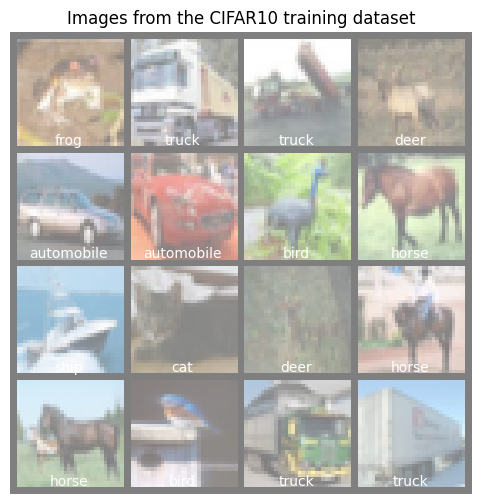

In [3]:
# Create and visualize the datasets for MNIST / CIFAR10
dataset_name = 'CIFAR10'
train_loader, test_loader = create_datasets(dataset_name, batch_size)

## Training loop

-----------------------------------------------------------------------------------------------------------------------------
Epoch:  1/100  Batch:    1  Train Loss:  34070  LR:  5e-05
Epoch:  1/100  Batch:  151  Train Loss:  22102.3  LR:  5e-05
Epoch:  1/100  Batch:  301  Train Loss:  14125.9  LR:  5e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│       1 │          11704.3 │ 7.94s  │
╘═════════╧══════════════════╧════════╛


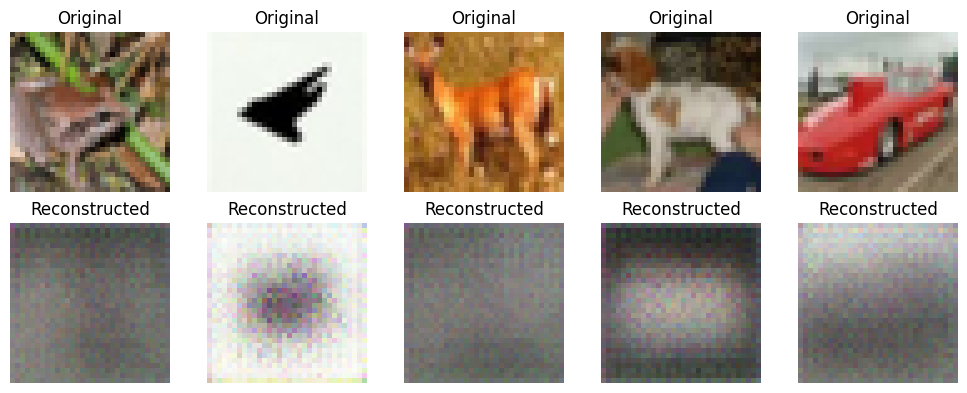

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  2/100  Batch:    1  Train Loss:  12285.6  LR:  4.99605e-05
Epoch:  2/100  Batch:  151  Train Loss:  10860.2  LR:  4.99605e-05
Epoch:  2/100  Batch:  301  Train Loss:  8841.65  LR:  4.99605e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│       2 │          9105.42 │ 5.34s  │
╘═════════╧══════════════════╧════════╛


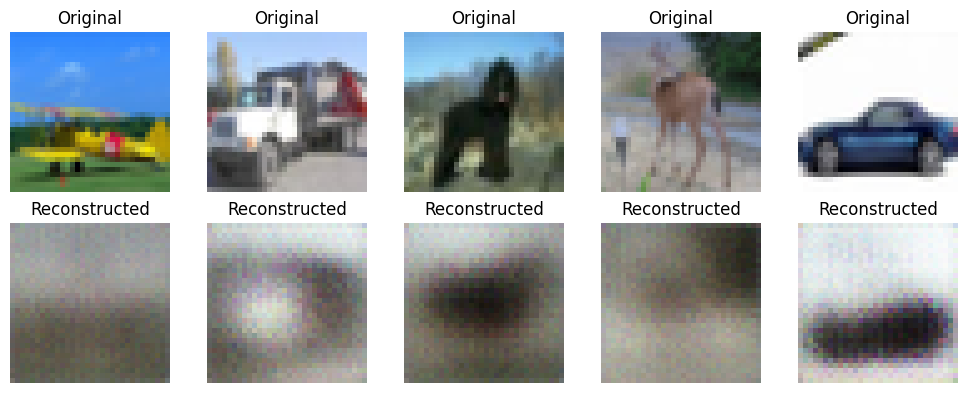

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  3/100  Batch:    1  Train Loss:  9177.92  LR:  4.98423e-05
Epoch:  3/100  Batch:  151  Train Loss:  9600.73  LR:  4.98423e-05
Epoch:  3/100  Batch:  301  Train Loss:  8620.18  LR:  4.98423e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│       3 │          8195.49 │ 5.13s  │
╘═════════╧══════════════════╧════════╛


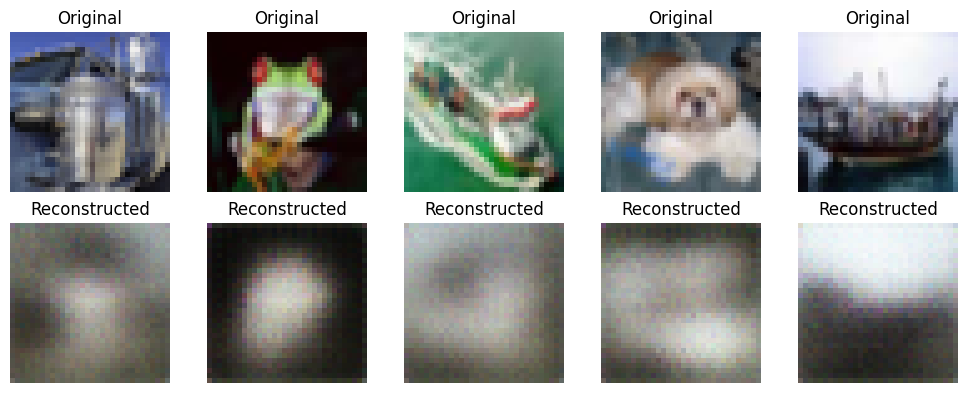

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  4/100  Batch:    1  Train Loss:  8223.16  LR:  4.96457e-05
Epoch:  4/100  Batch:  151  Train Loss:  7266.97  LR:  4.96457e-05
Epoch:  4/100  Batch:  301  Train Loss:  7402.09  LR:  4.96457e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│       4 │          6810.86 │ 5.34s  │
╘═════════╧══════════════════╧════════╛


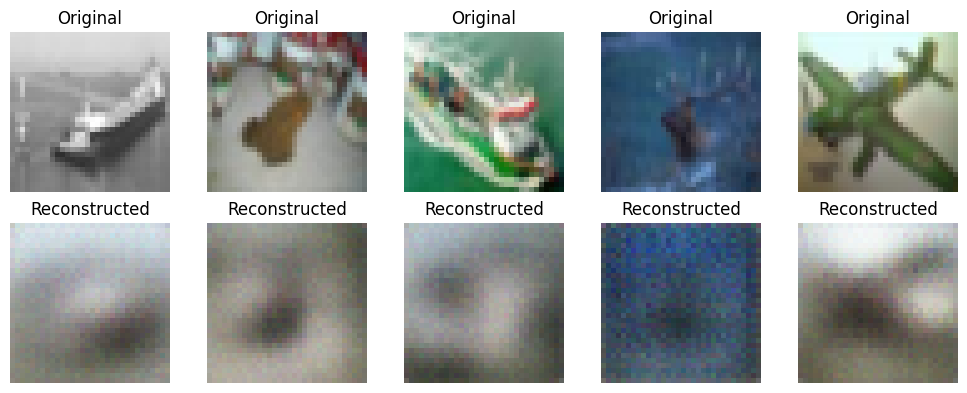

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  5/100  Batch:    1  Train Loss:  6982.16  LR:  4.93717e-05
Epoch:  5/100  Batch:  151  Train Loss:  7318.42  LR:  4.93717e-05
Epoch:  5/100  Batch:  301  Train Loss:  6710.2  LR:  4.93717e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│       5 │          6622.35 │ 5.06s  │
╘═════════╧══════════════════╧════════╛


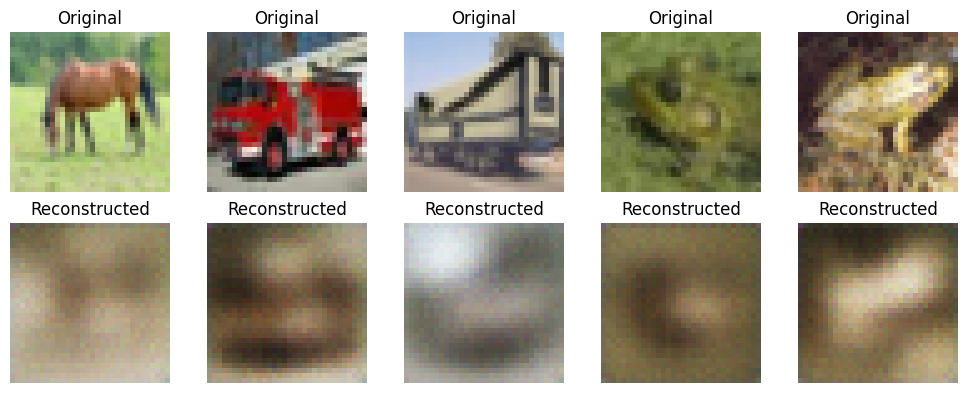

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  6/100  Batch:    1  Train Loss:  7257.9  LR:  4.90211e-05
Epoch:  6/100  Batch:  151  Train Loss:  6831.31  LR:  4.90211e-05
Epoch:  6/100  Batch:  301  Train Loss:  6165.24  LR:  4.90211e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│       6 │          5972.18 │ 5.18s  │
╘═════════╧══════════════════╧════════╛


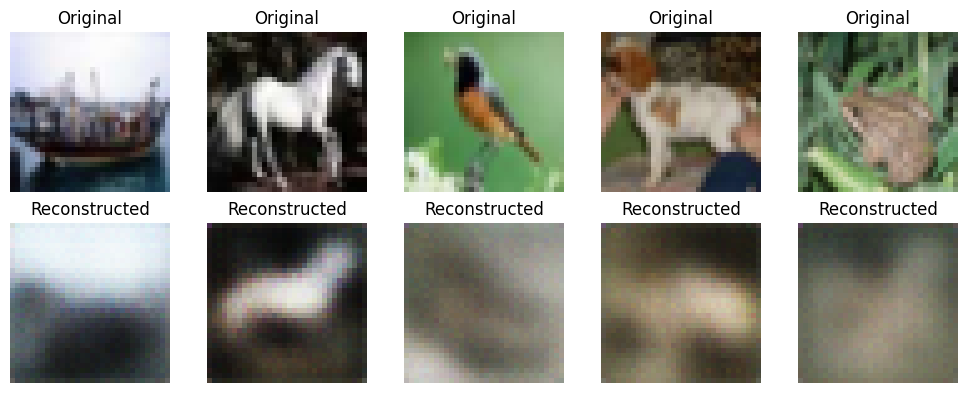

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  7/100  Batch:    1  Train Loss:  5652.44  LR:  4.85955e-05
Epoch:  7/100  Batch:  151  Train Loss:  6144.97  LR:  4.85955e-05
Epoch:  7/100  Batch:  301  Train Loss:  6047.67  LR:  4.85955e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│       7 │          5678.69 │ 5.47s  │
╘═════════╧══════════════════╧════════╛


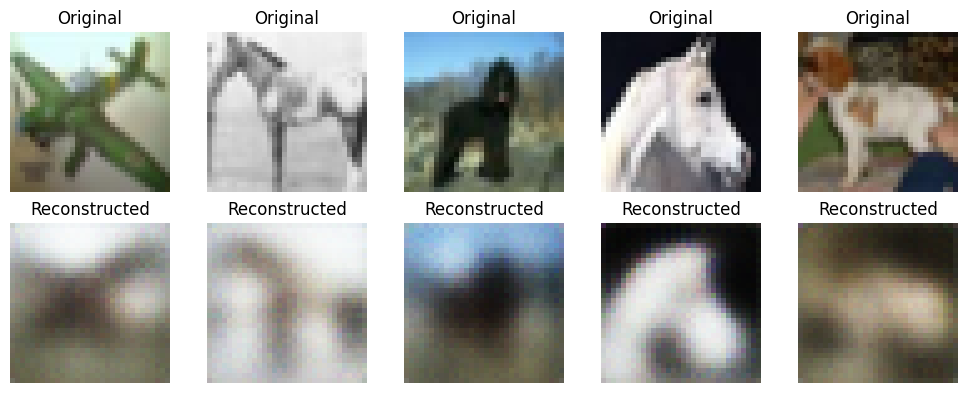

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  8/100  Batch:    1  Train Loss:  5598.23  LR:  4.80965e-05
Epoch:  8/100  Batch:  151  Train Loss:  6576.94  LR:  4.80965e-05
Epoch:  8/100  Batch:  301  Train Loss:  5650.46  LR:  4.80965e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│       8 │          5552.36 │ 5.22s  │
╘═════════╧══════════════════╧════════╛


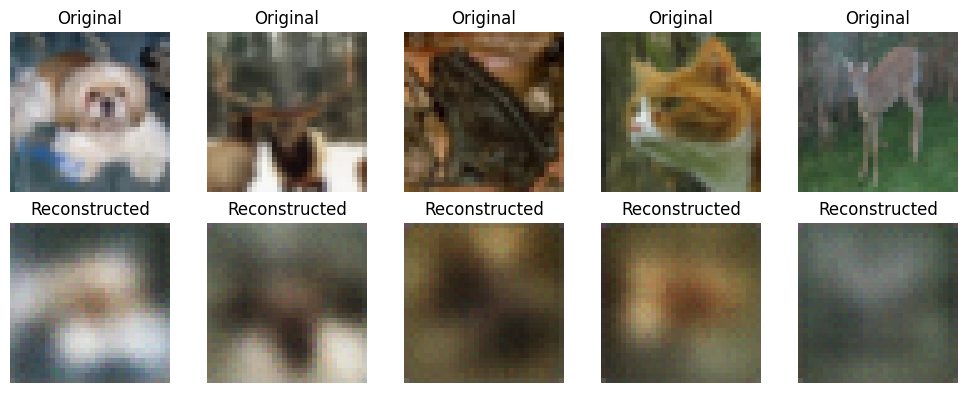

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  9/100  Batch:    1  Train Loss:  5441.76  LR:  4.75261e-05
Epoch:  9/100  Batch:  151  Train Loss:  5539.28  LR:  4.75261e-05
Epoch:  9/100  Batch:  301  Train Loss:  5482.75  LR:  4.75261e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│       9 │          5305.51 │ 5.18s  │
╘═════════╧══════════════════╧════════╛


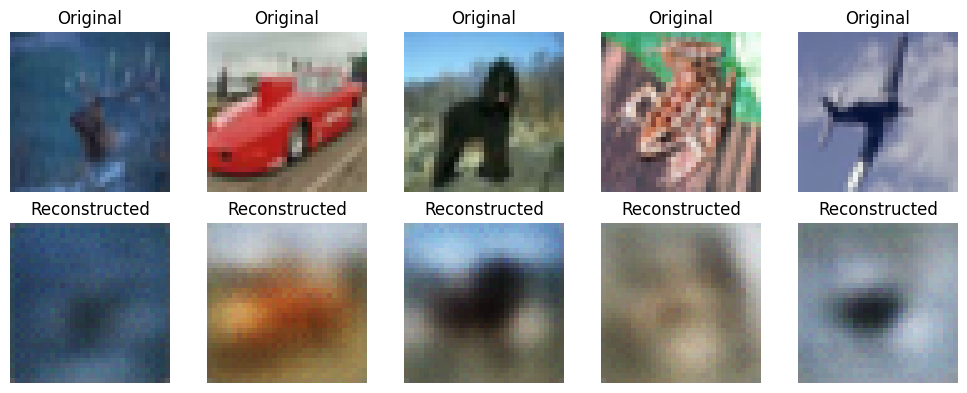

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  10/100  Batch:    1  Train Loss:  4960.88  LR:  4.68866e-05
Epoch:  10/100  Batch:  151  Train Loss:  5448.42  LR:  4.68866e-05
Epoch:  10/100  Batch:  301  Train Loss:  4991.07  LR:  4.68866e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      10 │          5215.08 │ 5.22s  │
╘═════════╧══════════════════╧════════╛


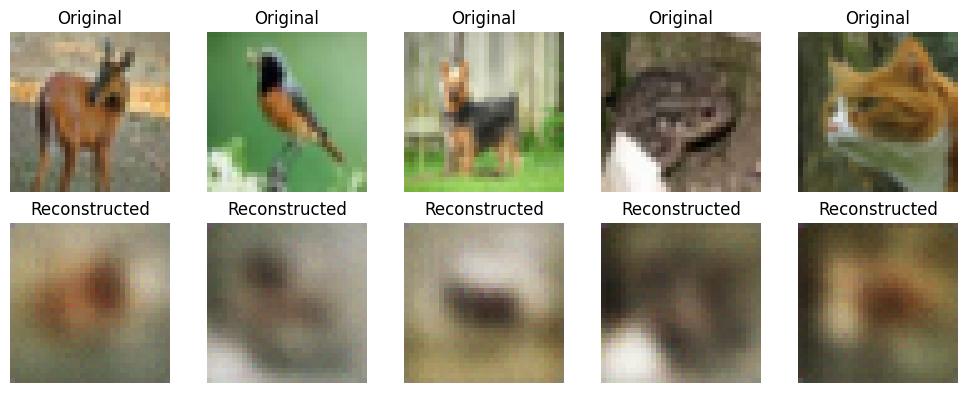

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  11/100  Batch:    1  Train Loss:  5338.03  LR:  4.61803e-05
Epoch:  11/100  Batch:  151  Train Loss:  5365.8  LR:  4.61803e-05
Epoch:  11/100  Batch:  301  Train Loss:  5275.11  LR:  4.61803e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      11 │           5014.8 │ 5.07s  │
╘═════════╧══════════════════╧════════╛


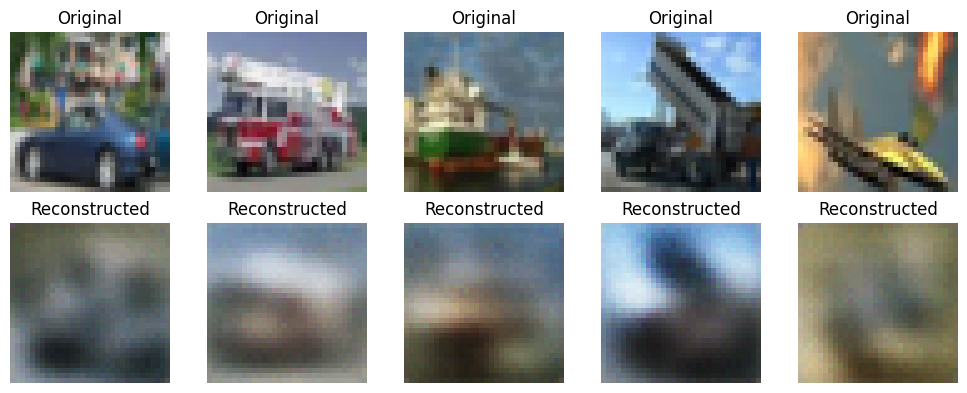

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  12/100  Batch:    1  Train Loss:  5031.71  LR:  4.54103e-05
Epoch:  12/100  Batch:  151  Train Loss:  5198.03  LR:  4.54103e-05
Epoch:  12/100  Batch:  301  Train Loss:  4858.72  LR:  4.54103e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      12 │          4891.18 │ 5.12s  │
╘═════════╧══════════════════╧════════╛


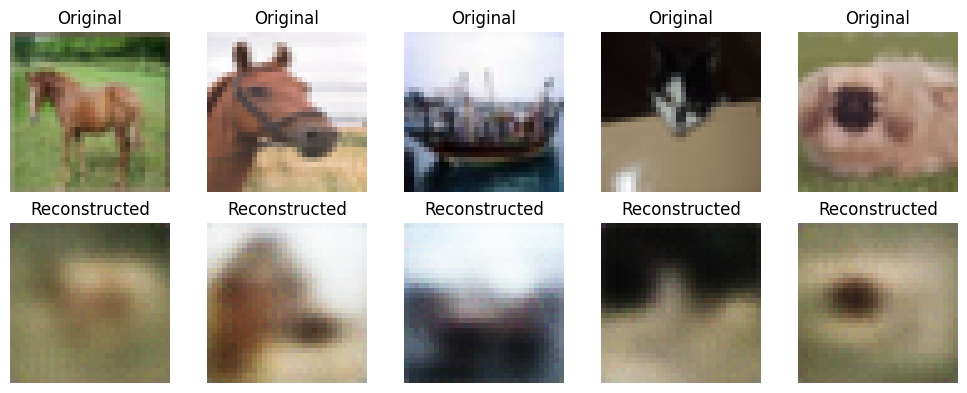

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  13/100  Batch:    1  Train Loss:  5032.97  LR:  4.45794e-05
Epoch:  13/100  Batch:  151  Train Loss:  4920.89  LR:  4.45794e-05
Epoch:  13/100  Batch:  301  Train Loss:  5096.18  LR:  4.45794e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      13 │           4785.7 │ 5.10s  │
╘═════════╧══════════════════╧════════╛


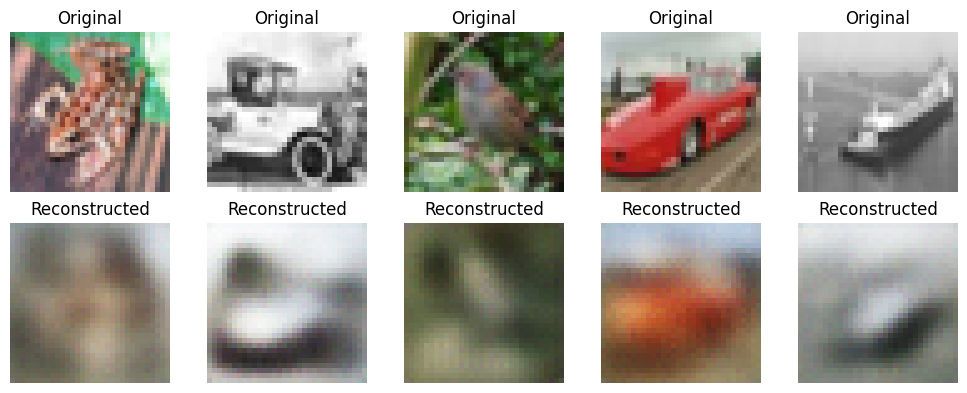

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  14/100  Batch:    1  Train Loss:  4612.49  LR:  4.36909e-05
Epoch:  14/100  Batch:  151  Train Loss:  4755.61  LR:  4.36909e-05
Epoch:  14/100  Batch:  301  Train Loss:  5080.36  LR:  4.36909e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      14 │           4716.3 │ 5.24s  │
╘═════════╧══════════════════╧════════╛


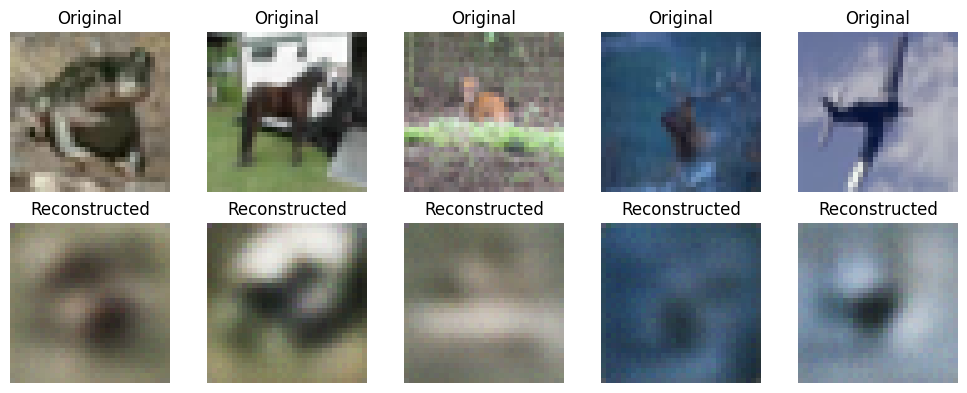

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  15/100  Batch:    1  Train Loss:  4956.31  LR:  4.27485e-05
Epoch:  15/100  Batch:  151  Train Loss:  4782.4  LR:  4.27485e-05
Epoch:  15/100  Batch:  301  Train Loss:  4641.38  LR:  4.27485e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      15 │          4843.15 │ 5.23s  │
╘═════════╧══════════════════╧════════╛


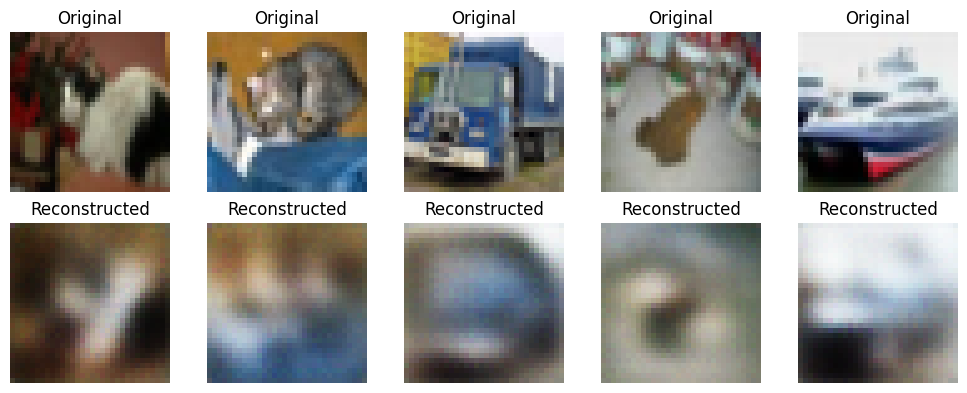

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  16/100  Batch:    1  Train Loss:  4837.29  LR:  4.17557e-05
Epoch:  16/100  Batch:  151  Train Loss:  4676.59  LR:  4.17557e-05
Epoch:  16/100  Batch:  301  Train Loss:  4370.28  LR:  4.17557e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      16 │           4623.6 │ 5.32s  │
╘═════════╧══════════════════╧════════╛


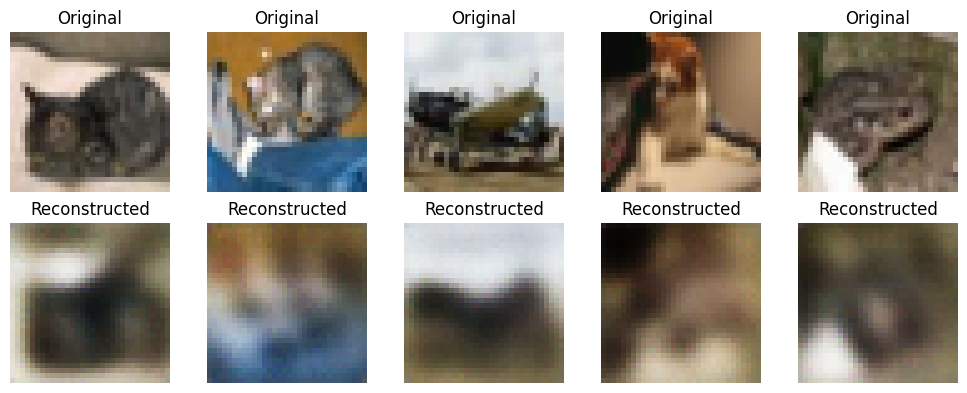

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  17/100  Batch:    1  Train Loss:  4466.45  LR:  4.07165e-05
Epoch:  17/100  Batch:  151  Train Loss:  4956  LR:  4.07165e-05
Epoch:  17/100  Batch:  301  Train Loss:  4473.01  LR:  4.07165e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      17 │          4477.27 │ 5.03s  │
╘═════════╧══════════════════╧════════╛


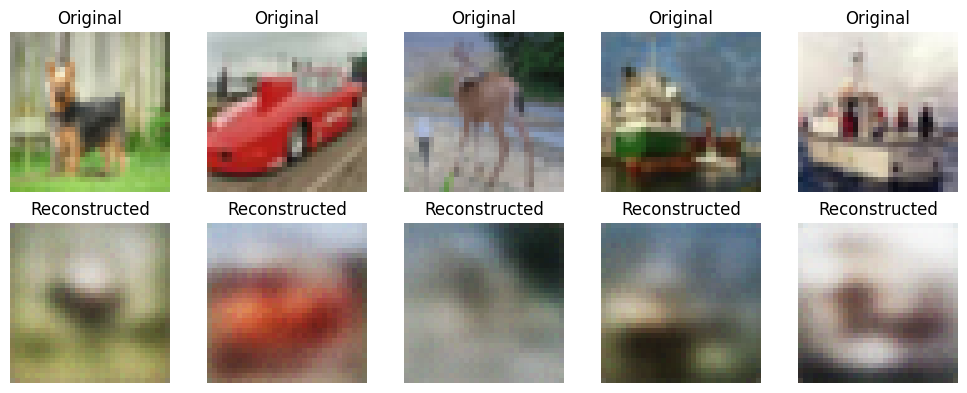

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  18/100  Batch:    1  Train Loss:  4922.41  LR:  3.96351e-05
Epoch:  18/100  Batch:  151  Train Loss:  4451.87  LR:  3.96351e-05
Epoch:  18/100  Batch:  301  Train Loss:  4372.32  LR:  3.96351e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      18 │          4360.35 │ 5.28s  │
╘═════════╧══════════════════╧════════╛


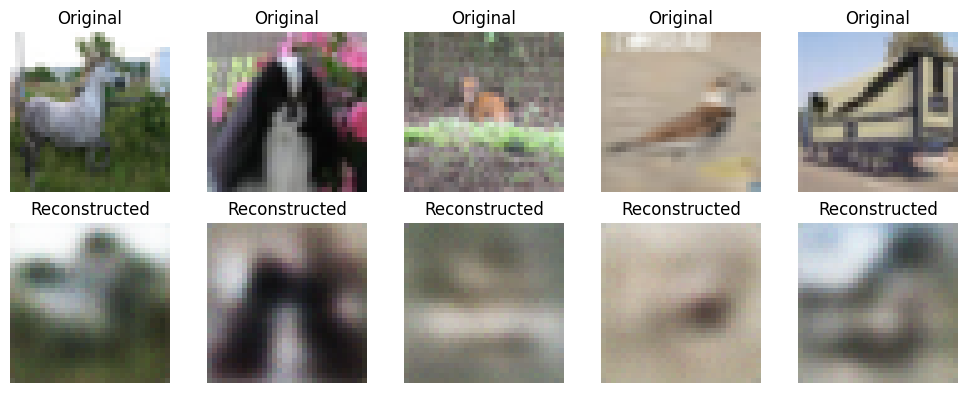

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  19/100  Batch:    1  Train Loss:  4417.48  LR:  3.85156e-05
Epoch:  19/100  Batch:  151  Train Loss:  4067.49  LR:  3.85156e-05
Epoch:  19/100  Batch:  301  Train Loss:  4165.55  LR:  3.85156e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      19 │          4301.85 │ 5.17s  │
╘═════════╧══════════════════╧════════╛


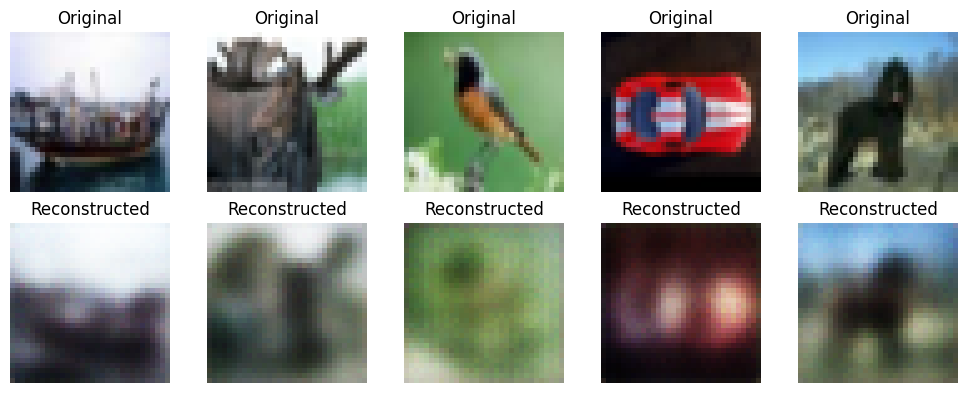

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  20/100  Batch:    1  Train Loss:  4074.47  LR:  3.73625e-05
Epoch:  20/100  Batch:  151  Train Loss:  4126.2  LR:  3.73625e-05
Epoch:  20/100  Batch:  301  Train Loss:  4512.36  LR:  3.73625e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      20 │          4192.09 │ 5.39s  │
╘═════════╧══════════════════╧════════╛


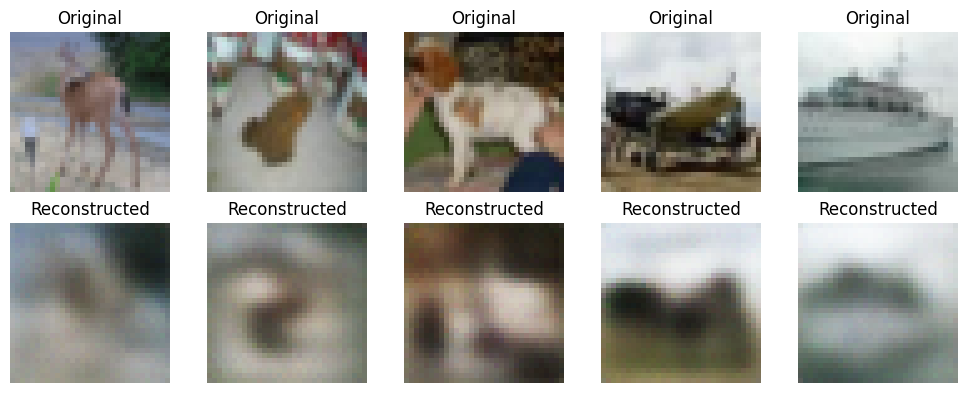

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  21/100  Batch:    1  Train Loss:  4261.1  LR:  3.61803e-05
Epoch:  21/100  Batch:  151  Train Loss:  4249.37  LR:  3.61803e-05
Epoch:  21/100  Batch:  301  Train Loss:  4044.28  LR:  3.61803e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      21 │          4178.58 │ 5.09s  │
╘═════════╧══════════════════╧════════╛


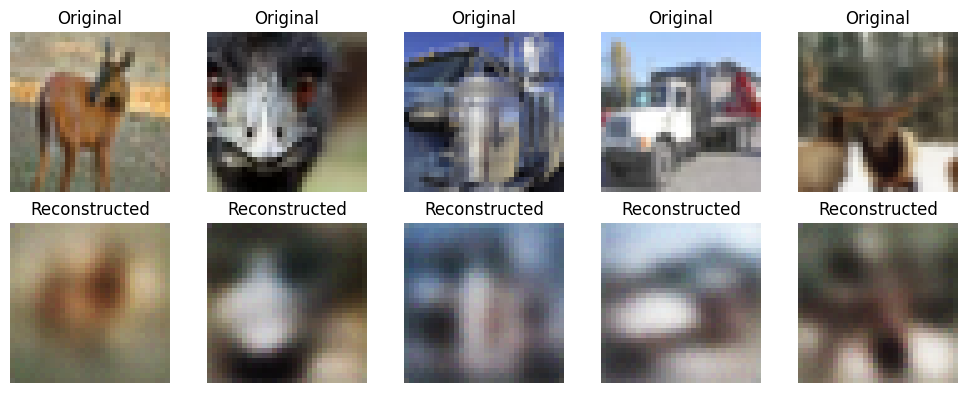

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  22/100  Batch:    1  Train Loss:  4239.62  LR:  3.49738e-05
Epoch:  22/100  Batch:  151  Train Loss:  4238.4  LR:  3.49738e-05
Epoch:  22/100  Batch:  301  Train Loss:  4126.45  LR:  3.49738e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      22 │          4188.39 │ 5.20s  │
╘═════════╧══════════════════╧════════╛


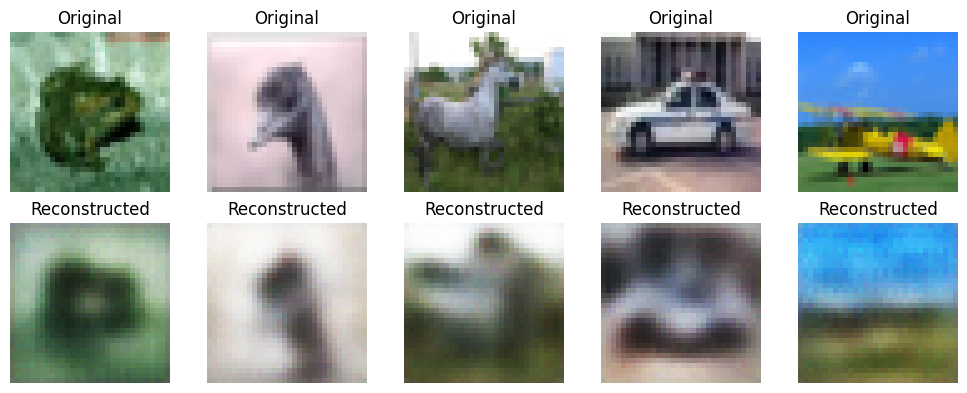

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  23/100  Batch:    1  Train Loss:  4161.83  LR:  3.37476e-05
Epoch:  23/100  Batch:  151  Train Loss:  4112.47  LR:  3.37476e-05
Epoch:  23/100  Batch:  301  Train Loss:  4291.17  LR:  3.37476e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      23 │          4166.41 │ 5.08s  │
╘═════════╧══════════════════╧════════╛


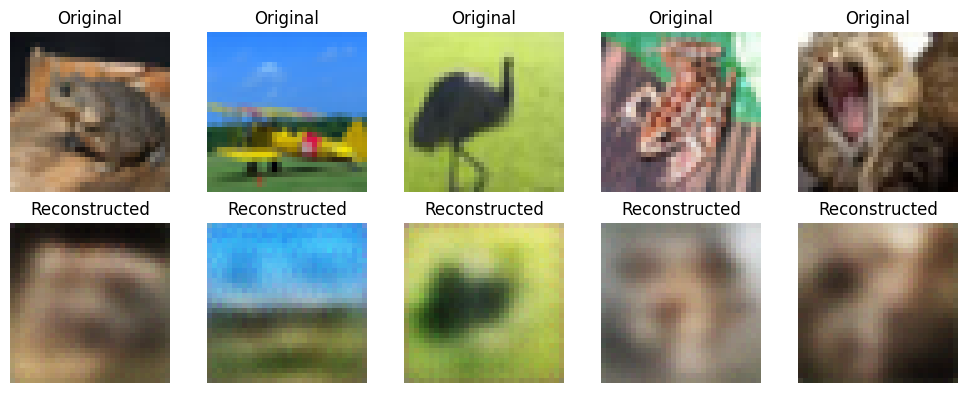

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  24/100  Batch:    1  Train Loss:  4130.24  LR:  3.25067e-05
Epoch:  24/100  Batch:  151  Train Loss:  4108.99  LR:  3.25067e-05
Epoch:  24/100  Batch:  301  Train Loss:  4064.11  LR:  3.25067e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      24 │          4073.32 │ 5.32s  │
╘═════════╧══════════════════╧════════╛


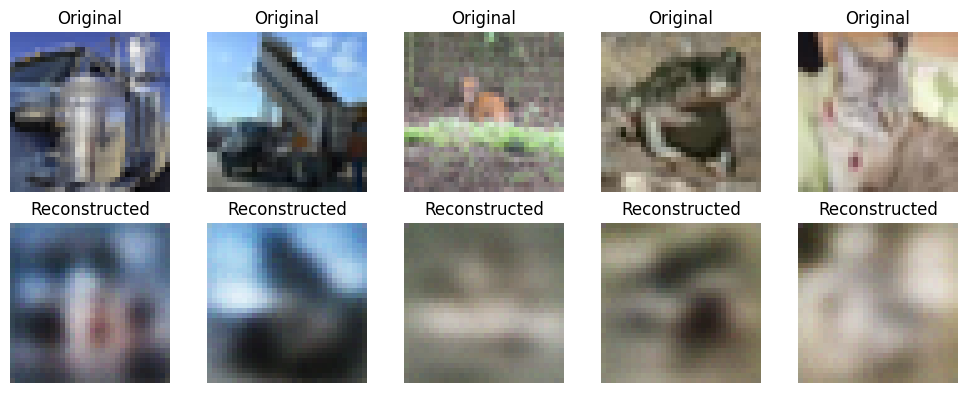

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  25/100  Batch:    1  Train Loss:  4187  LR:  3.12558e-05
Epoch:  25/100  Batch:  151  Train Loss:  3980.18  LR:  3.12558e-05
Epoch:  25/100  Batch:  301  Train Loss:  4119.72  LR:  3.12558e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      25 │          4018.45 │ 5.40s  │
╘═════════╧══════════════════╧════════╛


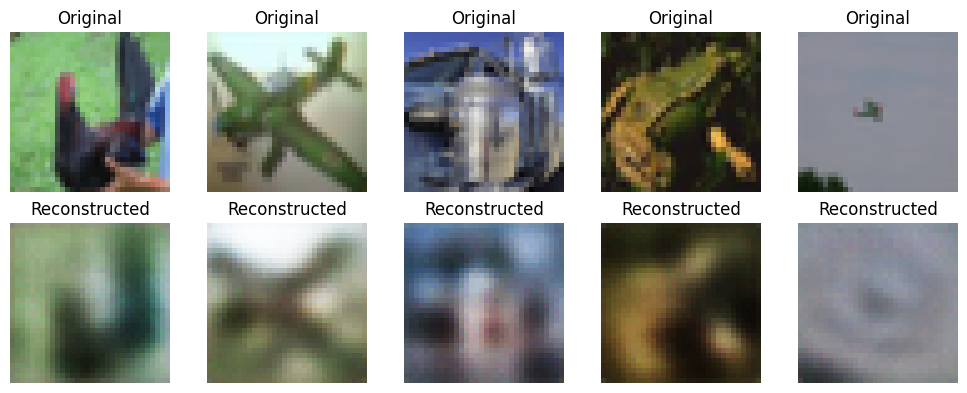

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  26/100  Batch:    1  Train Loss:  4047.98  LR:  3e-05
Epoch:  26/100  Batch:  151  Train Loss:  4203.52  LR:  3e-05
Epoch:  26/100  Batch:  301  Train Loss:  3929.31  LR:  3e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      26 │          4054.05 │ 5.10s  │
╘═════════╧══════════════════╧════════╛


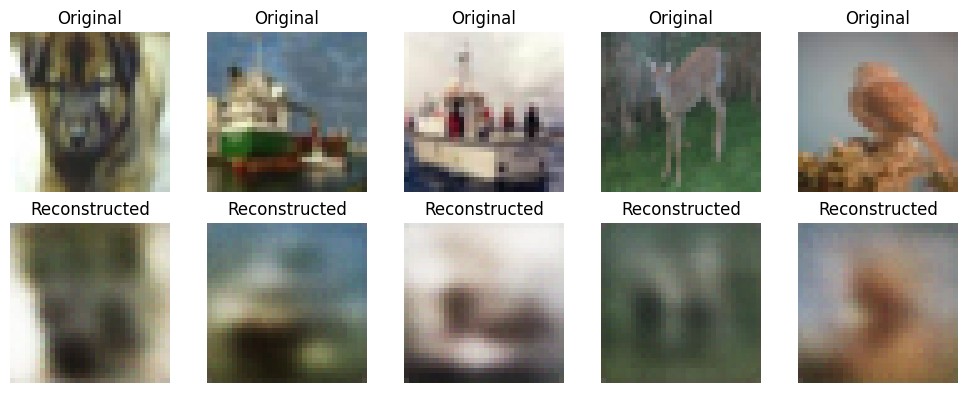

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  27/100  Batch:    1  Train Loss:  3930.03  LR:  2.87442e-05
Epoch:  27/100  Batch:  151  Train Loss:  4017.36  LR:  2.87442e-05
Epoch:  27/100  Batch:  301  Train Loss:  3936.18  LR:  2.87442e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      27 │          3916.55 │ 5.26s  │
╘═════════╧══════════════════╧════════╛


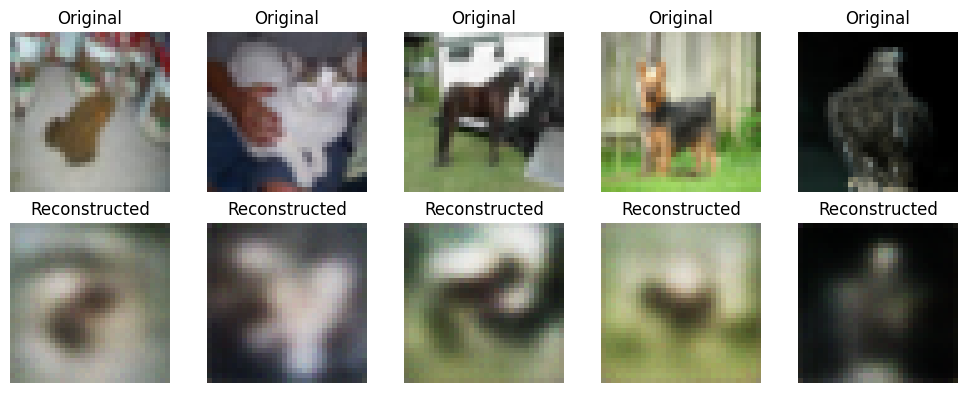

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  28/100  Batch:    1  Train Loss:  3824.86  LR:  2.74933e-05
Epoch:  28/100  Batch:  151  Train Loss:  3721.77  LR:  2.74933e-05
Epoch:  28/100  Batch:  301  Train Loss:  3960.47  LR:  2.74933e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      28 │          3848.27 │ 5.07s  │
╘═════════╧══════════════════╧════════╛


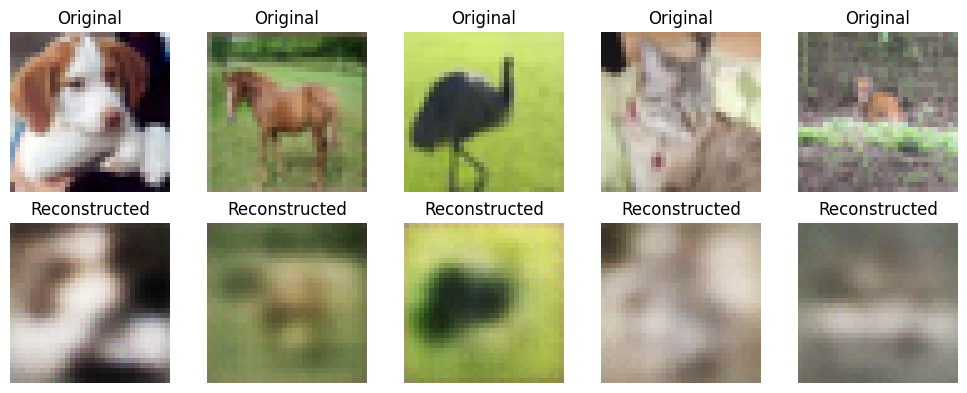

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  29/100  Batch:    1  Train Loss:  3970.4  LR:  2.62524e-05
Epoch:  29/100  Batch:  151  Train Loss:  3835.35  LR:  2.62524e-05
Epoch:  29/100  Batch:  301  Train Loss:  3880.06  LR:  2.62524e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      29 │          3895.61 │ 5.28s  │
╘═════════╧══════════════════╧════════╛


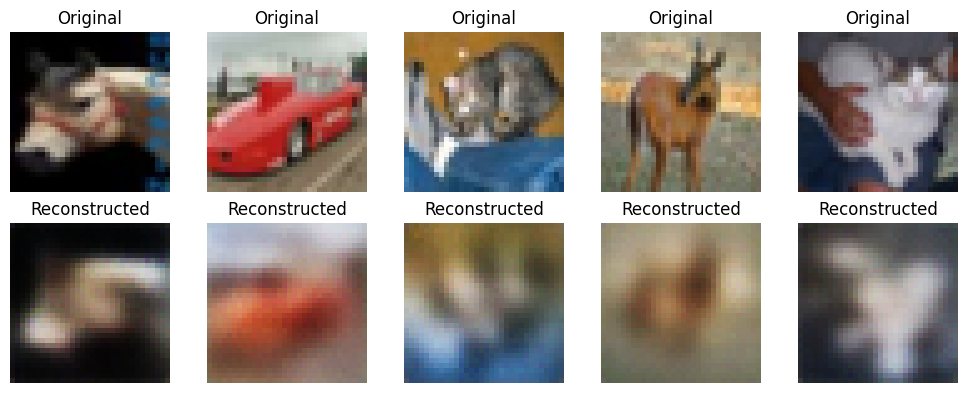

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  30/100  Batch:    1  Train Loss:  3766.31  LR:  2.50262e-05
Epoch:  30/100  Batch:  151  Train Loss:  4241.11  LR:  2.50262e-05
Epoch:  30/100  Batch:  301  Train Loss:  3977.95  LR:  2.50262e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      30 │           3824.3 │ 5.16s  │
╘═════════╧══════════════════╧════════╛


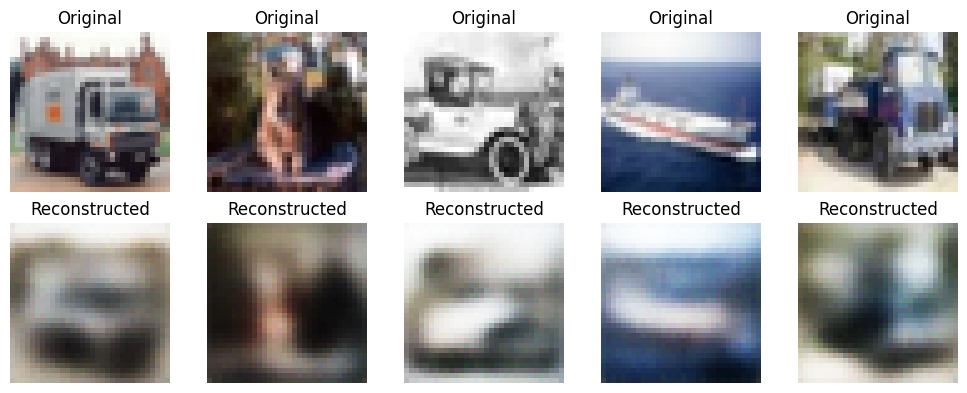

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  31/100  Batch:    1  Train Loss:  3999.67  LR:  2.38197e-05
Epoch:  31/100  Batch:  151  Train Loss:  4317.24  LR:  2.38197e-05
Epoch:  31/100  Batch:  301  Train Loss:  3997.27  LR:  2.38197e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      31 │          3774.31 │ 5.20s  │
╘═════════╧══════════════════╧════════╛


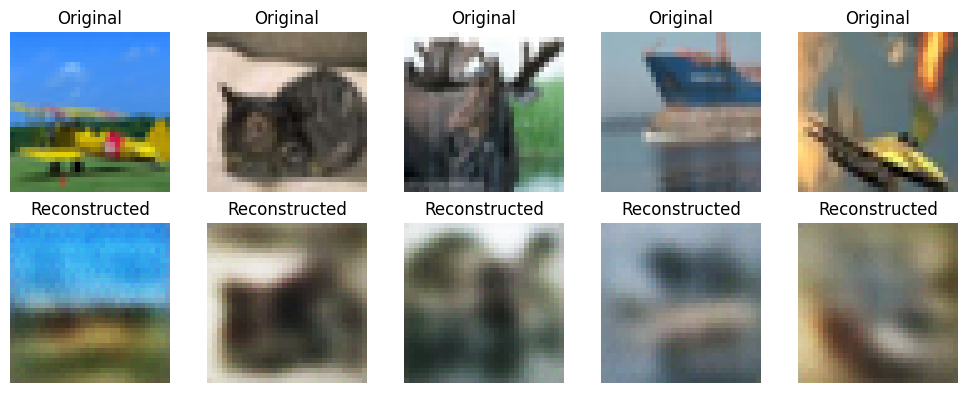

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  32/100  Batch:    1  Train Loss:  3705.03  LR:  2.26375e-05
Epoch:  32/100  Batch:  151  Train Loss:  3825.23  LR:  2.26375e-05
Epoch:  32/100  Batch:  301  Train Loss:  3601.23  LR:  2.26375e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      32 │          3755.43 │ 5.11s  │
╘═════════╧══════════════════╧════════╛


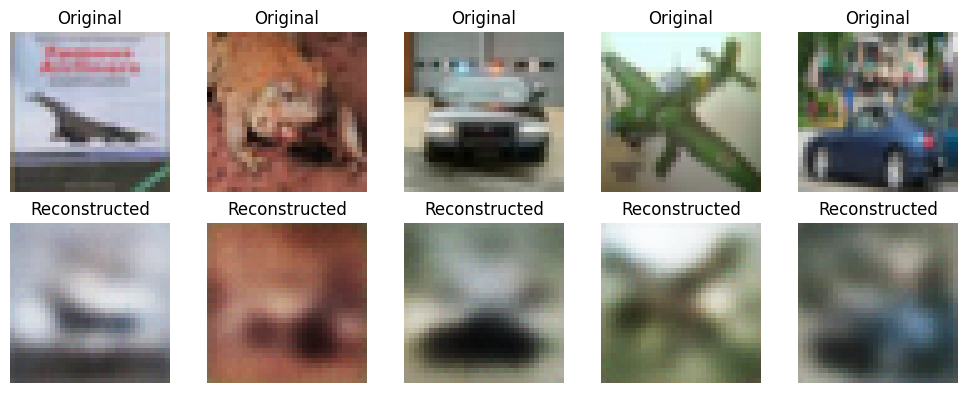

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  33/100  Batch:    1  Train Loss:  3928.7  LR:  2.14844e-05
Epoch:  33/100  Batch:  151  Train Loss:  4137.78  LR:  2.14844e-05
Epoch:  33/100  Batch:  301  Train Loss:  4100.86  LR:  2.14844e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      33 │          3718.01 │ 5.23s  │
╘═════════╧══════════════════╧════════╛


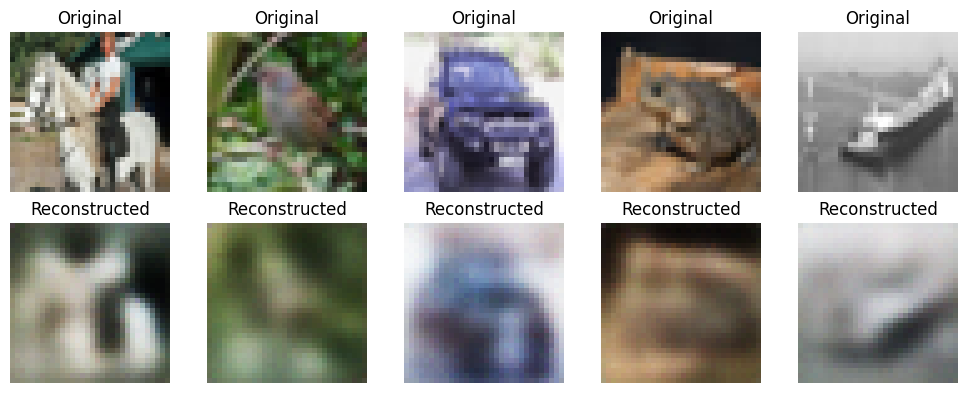

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  34/100  Batch:    1  Train Loss:  3542.92  LR:  2.03649e-05
Epoch:  34/100  Batch:  151  Train Loss:  3998.59  LR:  2.03649e-05
Epoch:  34/100  Batch:  301  Train Loss:  3727.28  LR:  2.03649e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      34 │          3765.01 │ 5.08s  │
╘═════════╧══════════════════╧════════╛


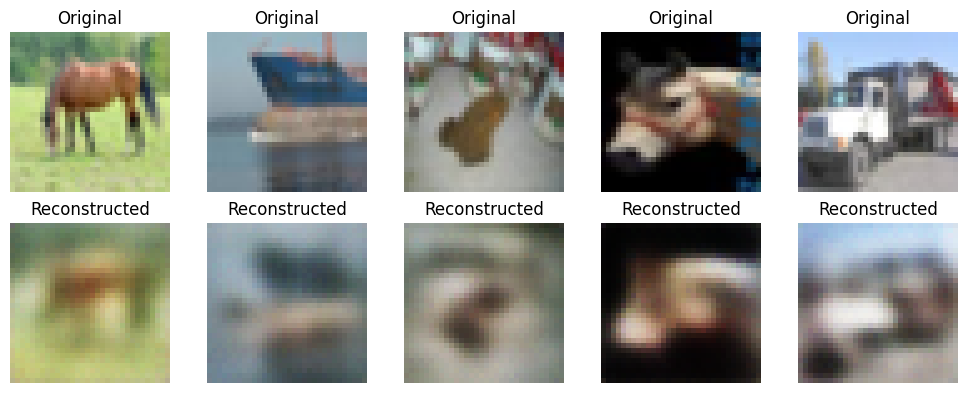

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  35/100  Batch:    1  Train Loss:  3766.92  LR:  1.92835e-05
Epoch:  35/100  Batch:  151  Train Loss:  3887.01  LR:  1.92835e-05
Epoch:  35/100  Batch:  301  Train Loss:  3533.82  LR:  1.92835e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      35 │          3707.11 │ 5.25s  │
╘═════════╧══════════════════╧════════╛


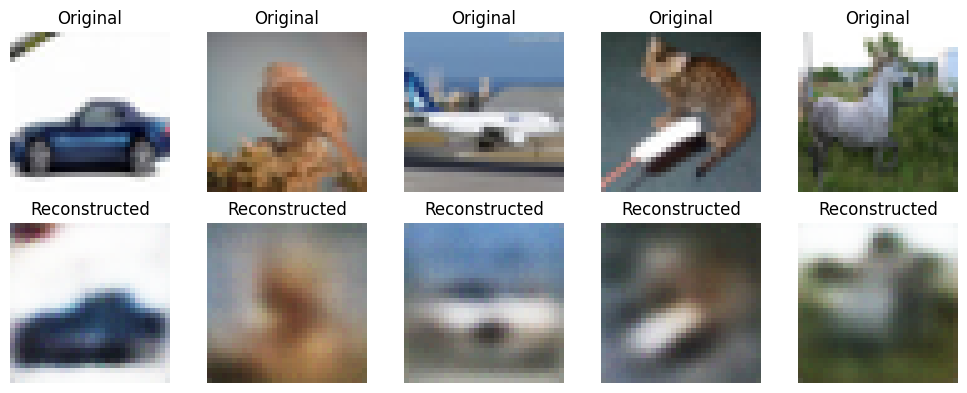

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  36/100  Batch:    1  Train Loss:  3527.55  LR:  1.82443e-05
Epoch:  36/100  Batch:  151  Train Loss:  3986.74  LR:  1.82443e-05
Epoch:  36/100  Batch:  301  Train Loss:  3791.32  LR:  1.82443e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      36 │          3683.14 │ 5.06s  │
╘═════════╧══════════════════╧════════╛


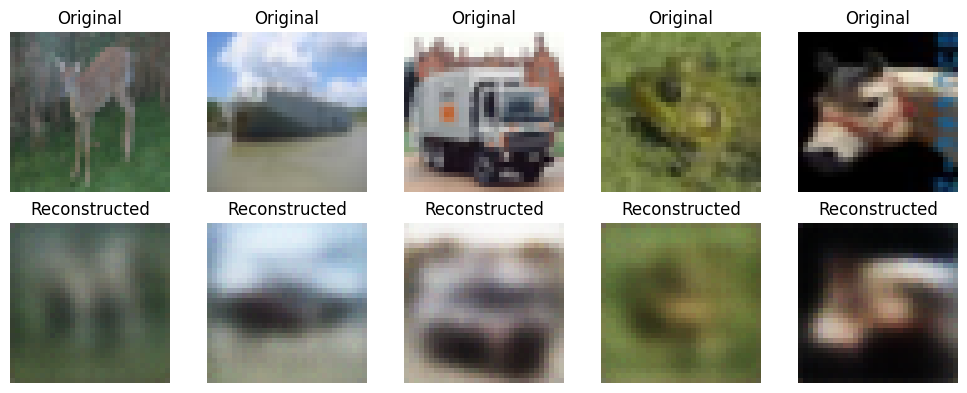

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  37/100  Batch:    1  Train Loss:  3374.56  LR:  1.72515e-05
Epoch:  37/100  Batch:  151  Train Loss:  3716.56  LR:  1.72515e-05
Epoch:  37/100  Batch:  301  Train Loss:  4042.13  LR:  1.72515e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      37 │          3646.14 │ 5.16s  │
╘═════════╧══════════════════╧════════╛


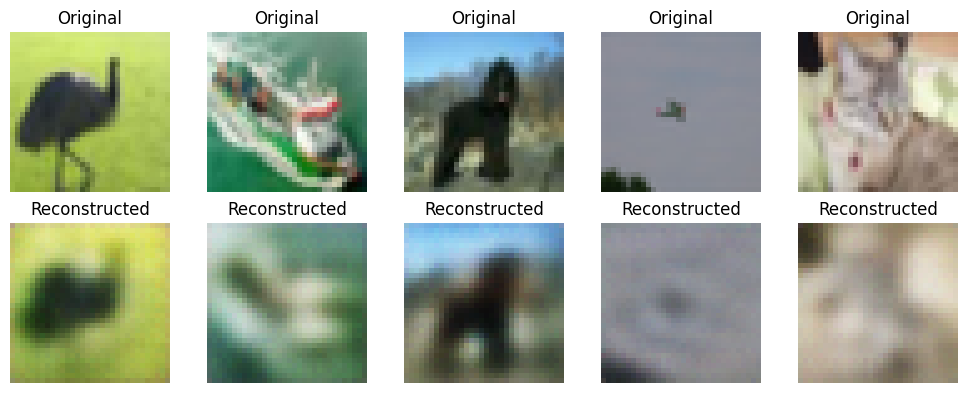

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  38/100  Batch:    1  Train Loss:  3434.79  LR:  1.63091e-05
Epoch:  38/100  Batch:  151  Train Loss:  4002.55  LR:  1.63091e-05
Epoch:  38/100  Batch:  301  Train Loss:  3746.54  LR:  1.63091e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      38 │          3601.33 │ 5.07s  │
╘═════════╧══════════════════╧════════╛


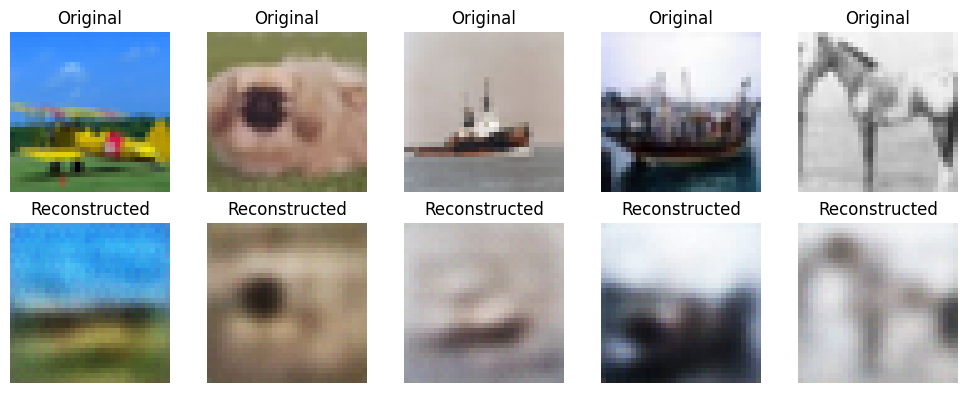

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  39/100  Batch:    1  Train Loss:  3591.84  LR:  1.54206e-05
Epoch:  39/100  Batch:  151  Train Loss:  3533.45  LR:  1.54206e-05
Epoch:  39/100  Batch:  301  Train Loss:  3793.99  LR:  1.54206e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      39 │          3629.81 │ 5.25s  │
╘═════════╧══════════════════╧════════╛


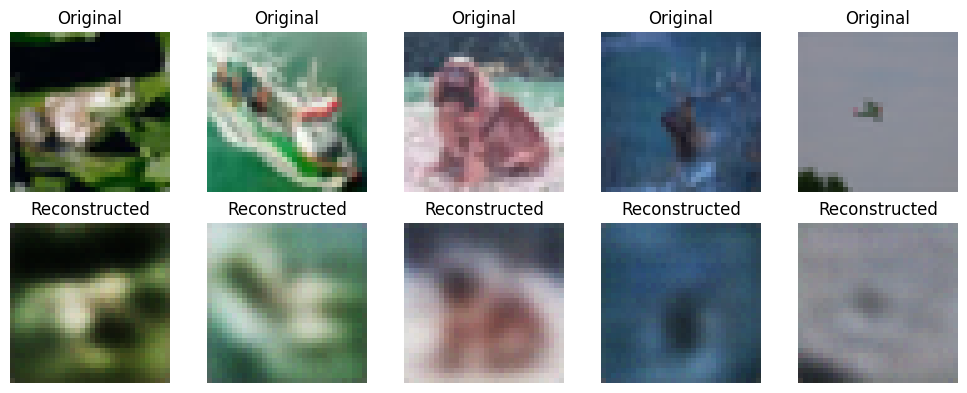

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  40/100  Batch:    1  Train Loss:  4034.51  LR:  1.45897e-05
Epoch:  40/100  Batch:  151  Train Loss:  3690.66  LR:  1.45897e-05
Epoch:  40/100  Batch:  301  Train Loss:  3864.72  LR:  1.45897e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      40 │          3588.55 │ 5.32s  │
╘═════════╧══════════════════╧════════╛


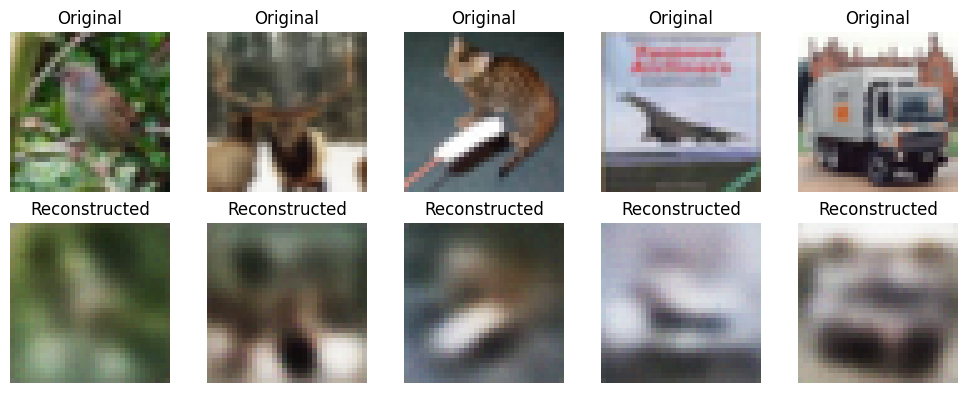

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  41/100  Batch:    1  Train Loss:  3655.13  LR:  1.38197e-05
Epoch:  41/100  Batch:  151  Train Loss:  3406.58  LR:  1.38197e-05
Epoch:  41/100  Batch:  301  Train Loss:  3724.01  LR:  1.38197e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      41 │          3576.54 │ 5.17s  │
╘═════════╧══════════════════╧════════╛


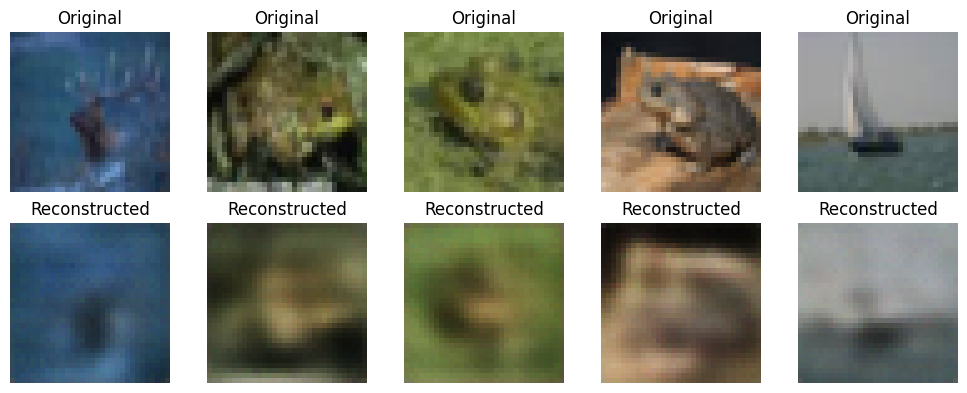

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  42/100  Batch:    1  Train Loss:  3759.53  LR:  1.31134e-05
Epoch:  42/100  Batch:  151  Train Loss:  3785.2  LR:  1.31134e-05
Epoch:  42/100  Batch:  301  Train Loss:  3339.23  LR:  1.31134e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      42 │           3563.3 │ 5.06s  │
╘═════════╧══════════════════╧════════╛


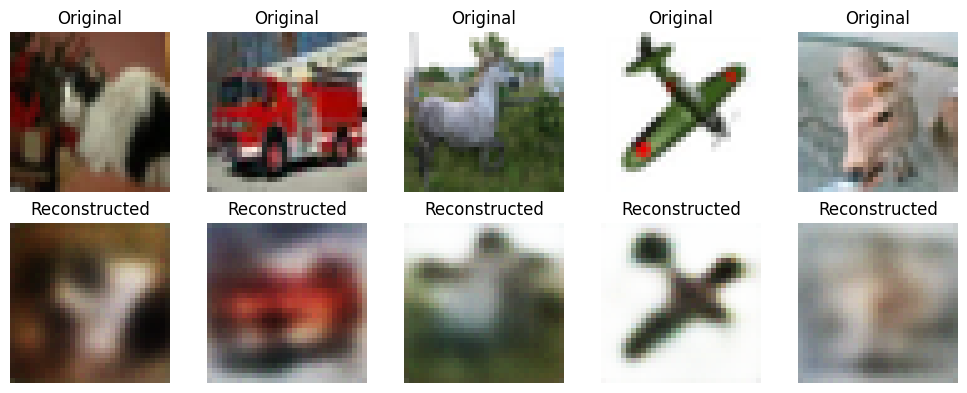

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  43/100  Batch:    1  Train Loss:  3680.2  LR:  1.24739e-05
Epoch:  43/100  Batch:  151  Train Loss:  3752.08  LR:  1.24739e-05
Epoch:  43/100  Batch:  301  Train Loss:  3582.65  LR:  1.24739e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      43 │          3565.23 │ 5.22s  │
╘═════════╧══════════════════╧════════╛


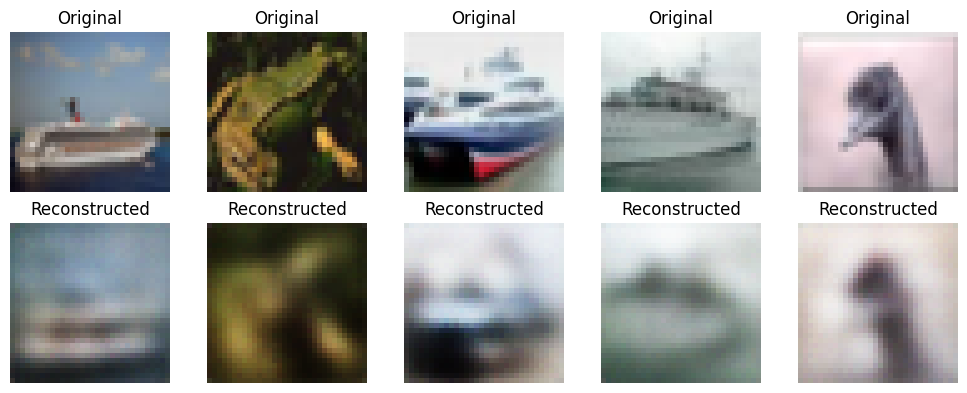

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  44/100  Batch:    1  Train Loss:  3827.24  LR:  1.19035e-05
Epoch:  44/100  Batch:  151  Train Loss:  3365.14  LR:  1.19035e-05
Epoch:  44/100  Batch:  301  Train Loss:  3725.27  LR:  1.19035e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      44 │          3540.11 │ 5.09s  │
╘═════════╧══════════════════╧════════╛


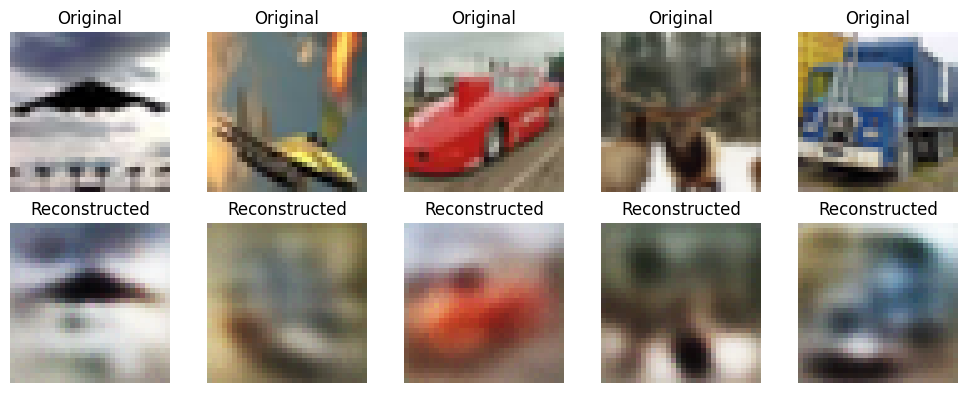

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  45/100  Batch:    1  Train Loss:  3463.67  LR:  1.14045e-05
Epoch:  45/100  Batch:  151  Train Loss:  3491.6  LR:  1.14045e-05
Epoch:  45/100  Batch:  301  Train Loss:  3401.54  LR:  1.14045e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      45 │          3527.12 │ 5.31s  │
╘═════════╧══════════════════╧════════╛


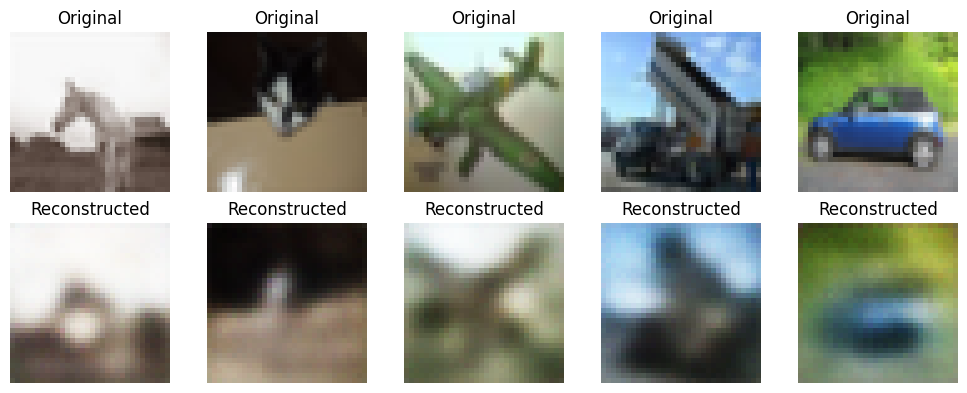

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  46/100  Batch:    1  Train Loss:  3743.03  LR:  1.09789e-05
Epoch:  46/100  Batch:  151  Train Loss:  3461.48  LR:  1.09789e-05
Epoch:  46/100  Batch:  301  Train Loss:  3710.22  LR:  1.09789e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      46 │          3491.87 │ 5.16s  │
╘═════════╧══════════════════╧════════╛


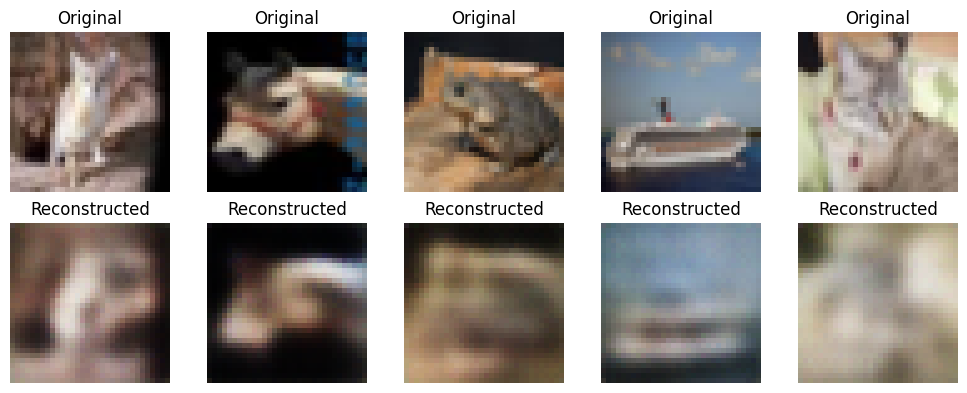

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  47/100  Batch:    1  Train Loss:  3675.6  LR:  1.06283e-05
Epoch:  47/100  Batch:  151  Train Loss:  3486.56  LR:  1.06283e-05
Epoch:  47/100  Batch:  301  Train Loss:  3545.58  LR:  1.06283e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      47 │          3513.46 │ 5.25s  │
╘═════════╧══════════════════╧════════╛


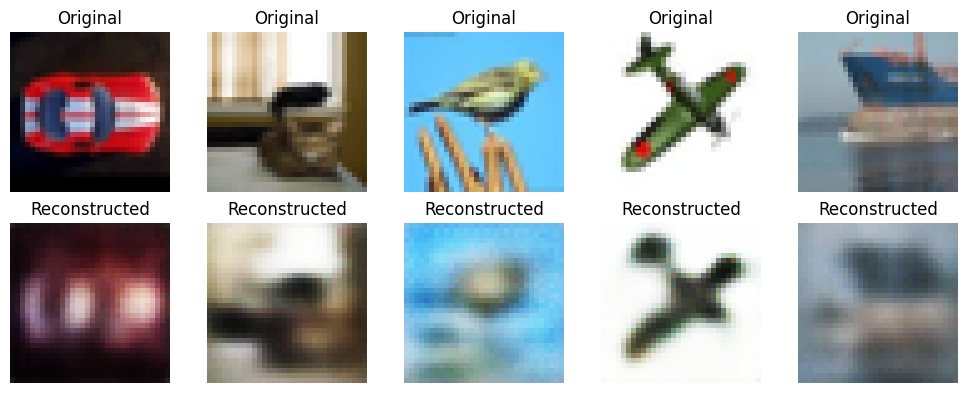

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  48/100  Batch:    1  Train Loss:  3529.24  LR:  1.03543e-05
Epoch:  48/100  Batch:  151  Train Loss:  3350.36  LR:  1.03543e-05
Epoch:  48/100  Batch:  301  Train Loss:  3300.77  LR:  1.03543e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      48 │          3484.21 │ 5.02s  │
╘═════════╧══════════════════╧════════╛


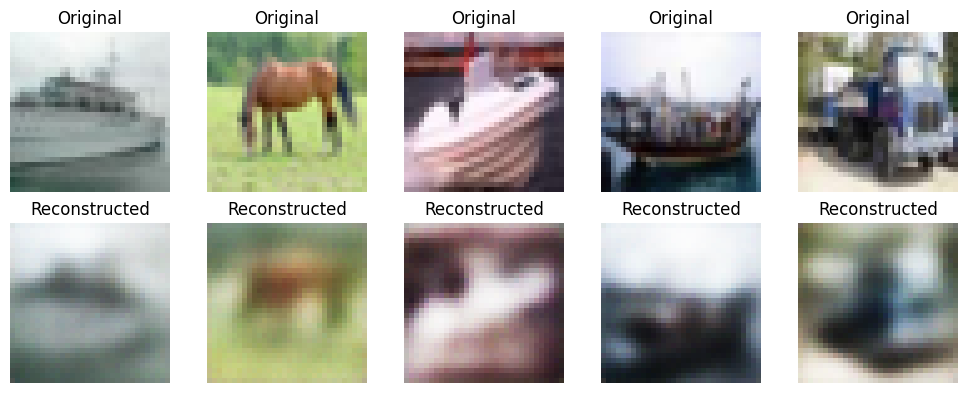

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  49/100  Batch:    1  Train Loss:  3436.36  LR:  1.01577e-05
Epoch:  49/100  Batch:  151  Train Loss:  3345.31  LR:  1.01577e-05
Epoch:  49/100  Batch:  301  Train Loss:  3285.3  LR:  1.01577e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      49 │          3490.02 │ 5.21s  │
╘═════════╧══════════════════╧════════╛


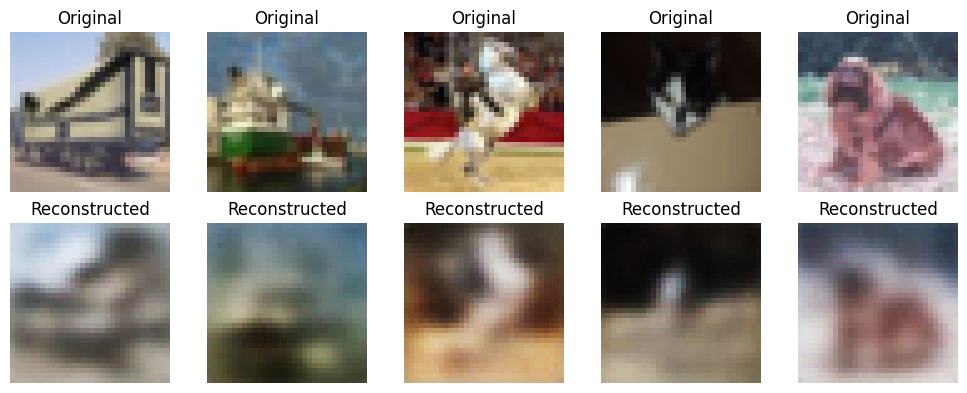

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  50/100  Batch:    1  Train Loss:  3331.7  LR:  1.00395e-05
Epoch:  50/100  Batch:  151  Train Loss:  3251.75  LR:  1.00395e-05
Epoch:  50/100  Batch:  301  Train Loss:  3401.69  LR:  1.00395e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      50 │          3498.93 │ 5.20s  │
╘═════════╧══════════════════╧════════╛


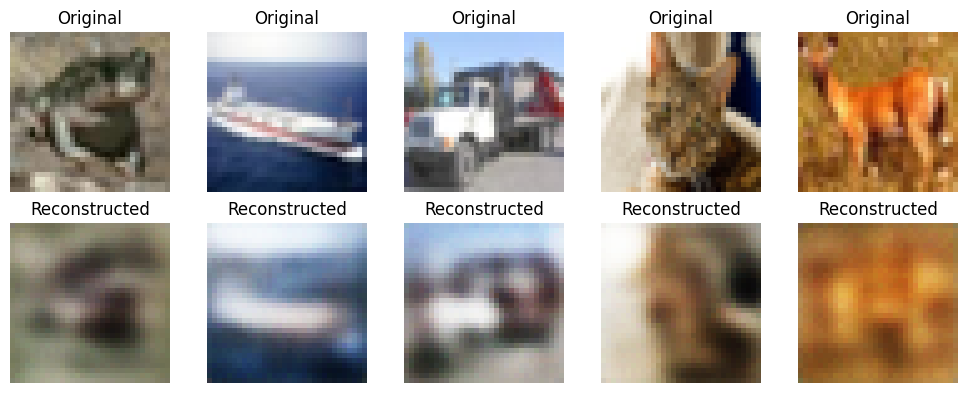

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  51/100  Batch:    1  Train Loss:  3843.85  LR:  1e-05
Epoch:  51/100  Batch:  151  Train Loss:  3537.06  LR:  1e-05
Epoch:  51/100  Batch:  301  Train Loss:  3395.51  LR:  1e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      51 │          3448.32 │ 5.45s  │
╘═════════╧══════════════════╧════════╛


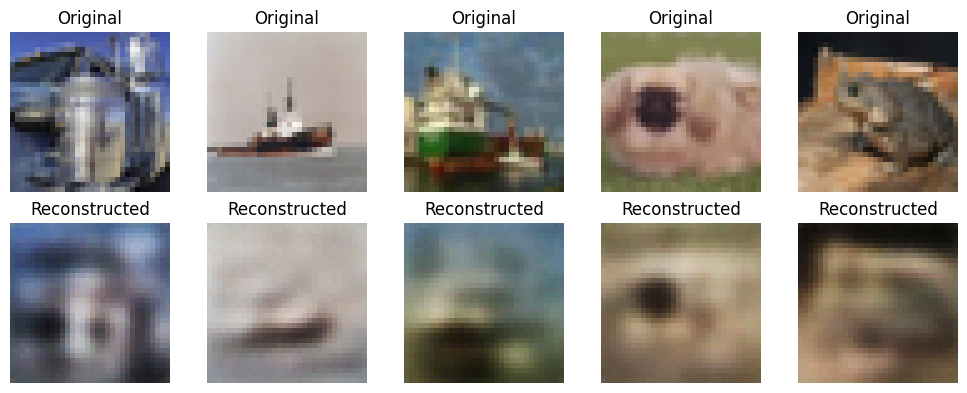

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  52/100  Batch:    1  Train Loss:  3709.58  LR:  1.00395e-05
Epoch:  52/100  Batch:  151  Train Loss:  3438.6  LR:  1.00395e-05
Epoch:  52/100  Batch:  301  Train Loss:  3458.79  LR:  1.00395e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      52 │          3441.62 │ 5.26s  │
╘═════════╧══════════════════╧════════╛


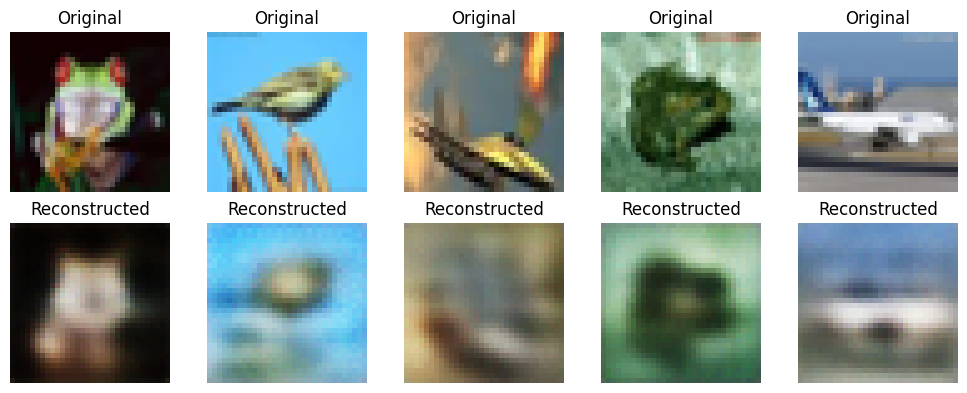

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  53/100  Batch:    1  Train Loss:  3610.25  LR:  1.01577e-05
Epoch:  53/100  Batch:  151  Train Loss:  3400.73  LR:  1.01577e-05
Epoch:  53/100  Batch:  301  Train Loss:  3525.5  LR:  1.01577e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      53 │          3480.49 │ 5.33s  │
╘═════════╧══════════════════╧════════╛


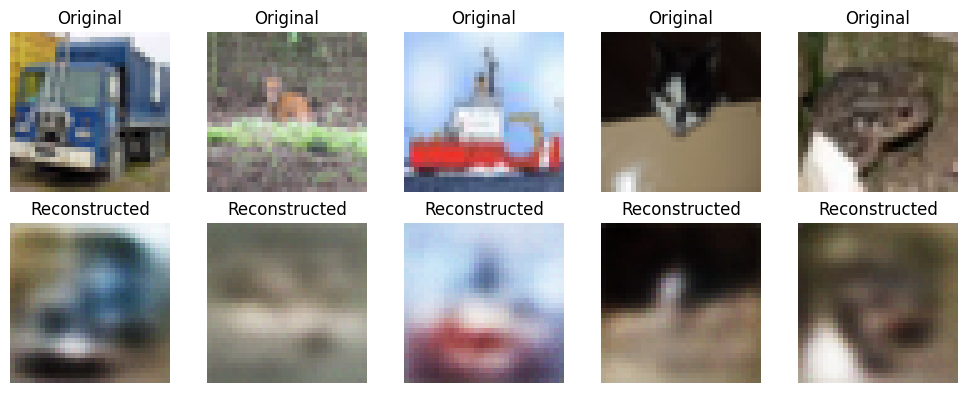

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  54/100  Batch:    1  Train Loss:  3597.75  LR:  1.03543e-05
Epoch:  54/100  Batch:  151  Train Loss:  3360.24  LR:  1.03543e-05
Epoch:  54/100  Batch:  301  Train Loss:  3529.62  LR:  1.03543e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      54 │          3444.85 │ 5.16s  │
╘═════════╧══════════════════╧════════╛


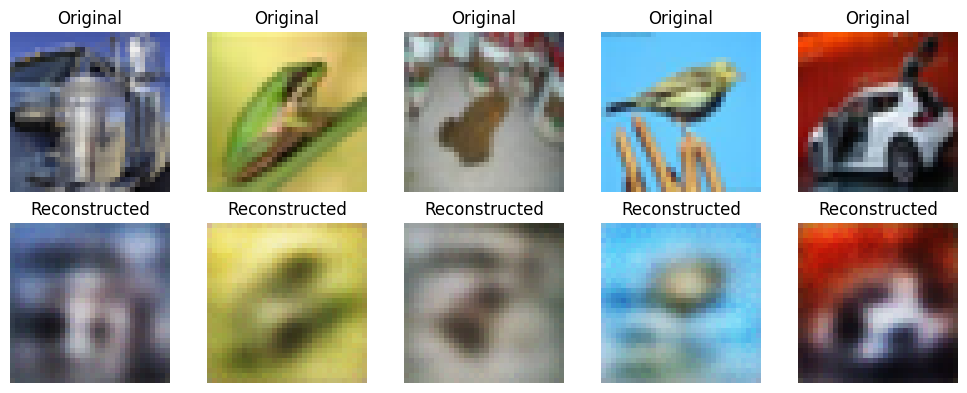

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  55/100  Batch:    1  Train Loss:  3608.19  LR:  1.06283e-05
Epoch:  55/100  Batch:  151  Train Loss:  3543.85  LR:  1.06283e-05
Epoch:  55/100  Batch:  301  Train Loss:  3385.87  LR:  1.06283e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      55 │          3432.94 │ 5.26s  │
╘═════════╧══════════════════╧════════╛


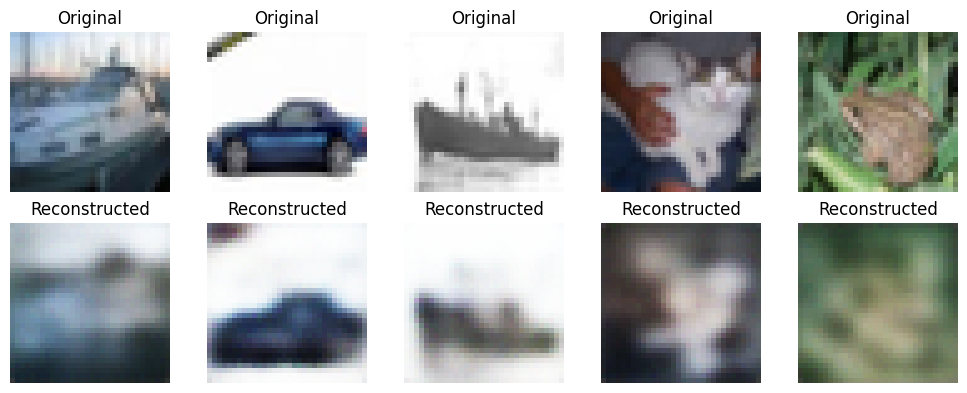

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  56/100  Batch:    1  Train Loss:  3562.04  LR:  1.09789e-05
Epoch:  56/100  Batch:  151  Train Loss:  3487.54  LR:  1.09789e-05
Epoch:  56/100  Batch:  301  Train Loss:  3632.8  LR:  1.09789e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      56 │          3437.88 │ 5.25s  │
╘═════════╧══════════════════╧════════╛


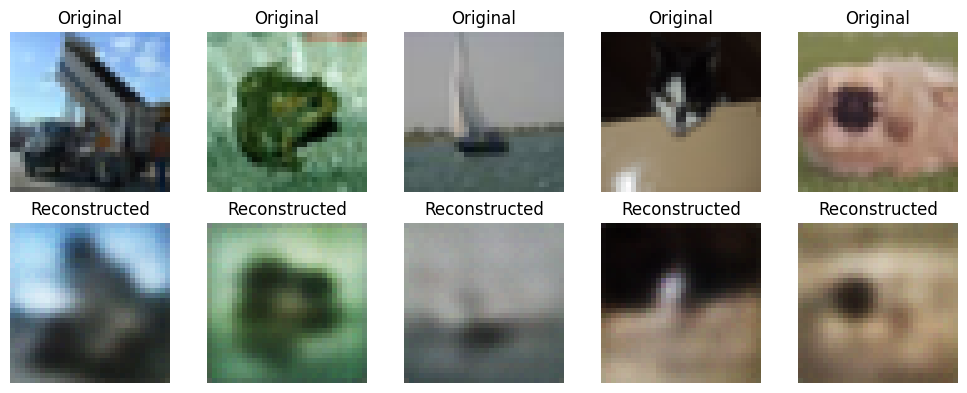

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  57/100  Batch:    1  Train Loss:  3404.07  LR:  1.14045e-05
Epoch:  57/100  Batch:  151  Train Loss:  3640.58  LR:  1.14045e-05
Epoch:  57/100  Batch:  301  Train Loss:  3474.06  LR:  1.14045e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      57 │          3435.63 │ 5.29s  │
╘═════════╧══════════════════╧════════╛


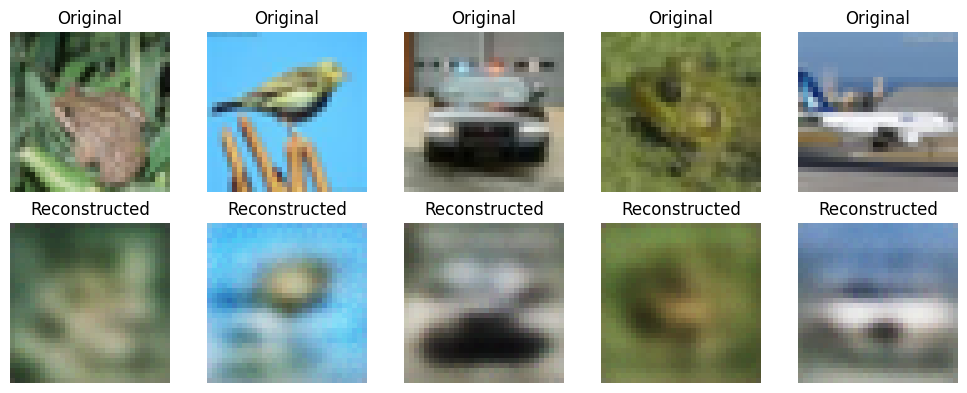

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  58/100  Batch:    1  Train Loss:  3715.81  LR:  1.19035e-05
Epoch:  58/100  Batch:  151  Train Loss:  3359.23  LR:  1.19035e-05
Epoch:  58/100  Batch:  301  Train Loss:  3282.76  LR:  1.19035e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      58 │          3412.05 │ 5.16s  │
╘═════════╧══════════════════╧════════╛


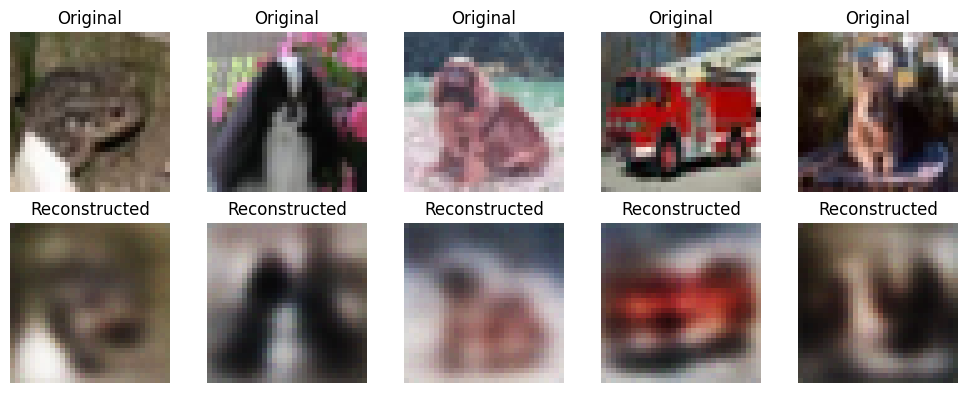

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  59/100  Batch:    1  Train Loss:  3480.82  LR:  1.24739e-05
Epoch:  59/100  Batch:  151  Train Loss:  3455.78  LR:  1.24739e-05
Epoch:  59/100  Batch:  301  Train Loss:  3468.81  LR:  1.24739e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      59 │          3404.03 │ 5.27s  │
╘═════════╧══════════════════╧════════╛


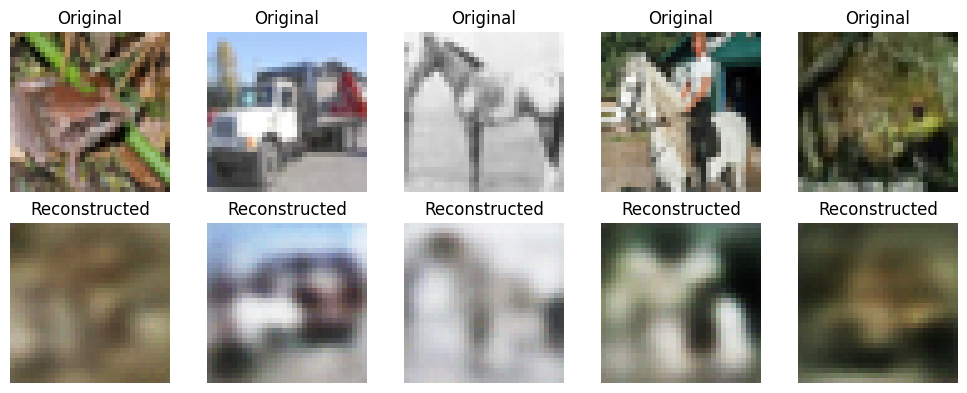

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  60/100  Batch:    1  Train Loss:  3452.98  LR:  1.31134e-05
Epoch:  60/100  Batch:  151  Train Loss:  3205.91  LR:  1.31134e-05
Epoch:  60/100  Batch:  301  Train Loss:  3389.23  LR:  1.31134e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      60 │           3458.9 │ 5.32s  │
╘═════════╧══════════════════╧════════╛


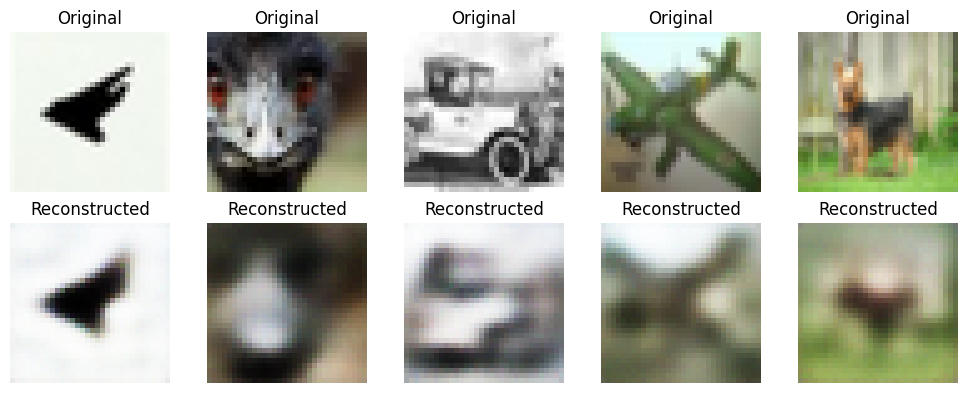

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  61/100  Batch:    1  Train Loss:  3537.92  LR:  1.38197e-05
Epoch:  61/100  Batch:  151  Train Loss:  3462.92  LR:  1.38197e-05
Epoch:  61/100  Batch:  301  Train Loss:  3307.31  LR:  1.38197e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      61 │          3394.62 │ 5.17s  │
╘═════════╧══════════════════╧════════╛


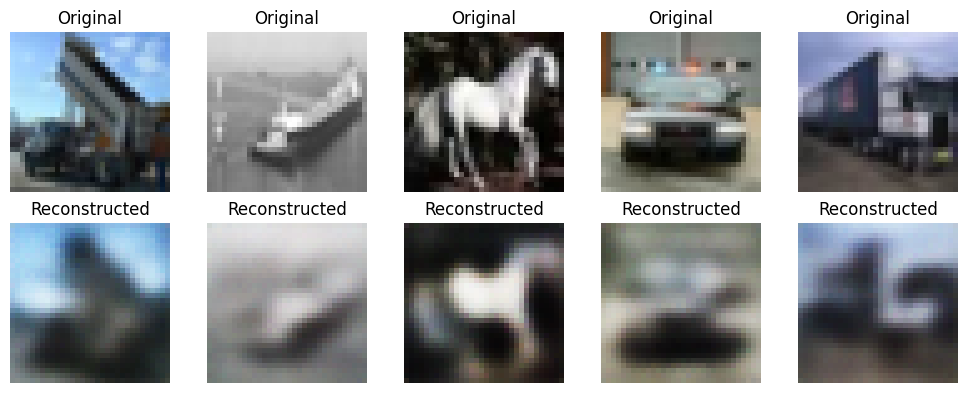

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  62/100  Batch:    1  Train Loss:  3485.47  LR:  1.45897e-05
Epoch:  62/100  Batch:  151  Train Loss:  4029.51  LR:  1.45897e-05
Epoch:  62/100  Batch:  301  Train Loss:  3317  LR:  1.45897e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      62 │          3396.43 │ 5.22s  │
╘═════════╧══════════════════╧════════╛


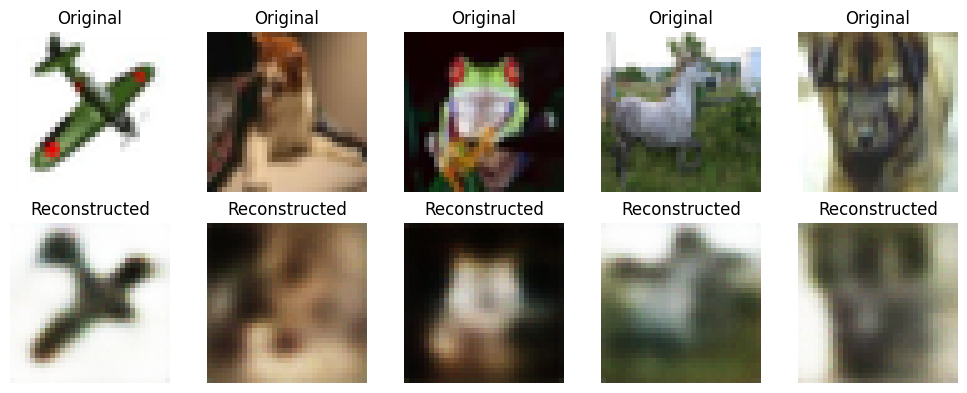

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  63/100  Batch:    1  Train Loss:  3350.99  LR:  1.54206e-05
Epoch:  63/100  Batch:  151  Train Loss:  3402.23  LR:  1.54206e-05
Epoch:  63/100  Batch:  301  Train Loss:  3406.85  LR:  1.54206e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      63 │          3381.02 │ 5.21s  │
╘═════════╧══════════════════╧════════╛


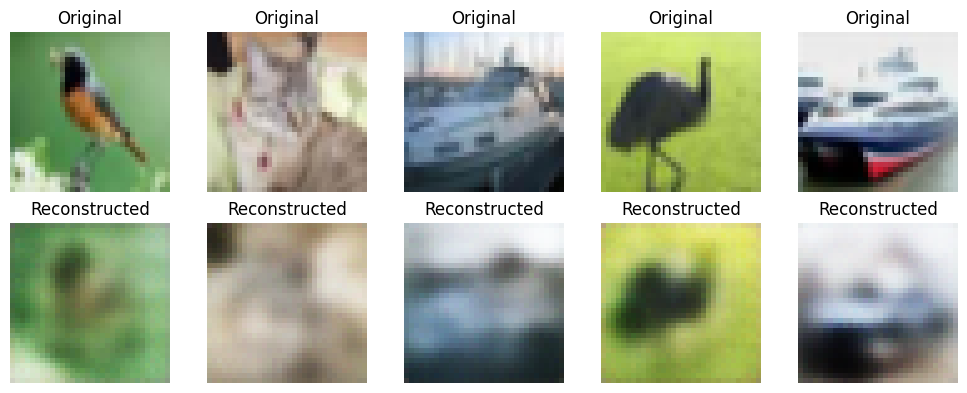

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  64/100  Batch:    1  Train Loss:  3590.47  LR:  1.63091e-05
Epoch:  64/100  Batch:  151  Train Loss:  3459.75  LR:  1.63091e-05
Epoch:  64/100  Batch:  301  Train Loss:  3159.2  LR:  1.63091e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      64 │          3374.73 │ 5.18s  │
╘═════════╧══════════════════╧════════╛


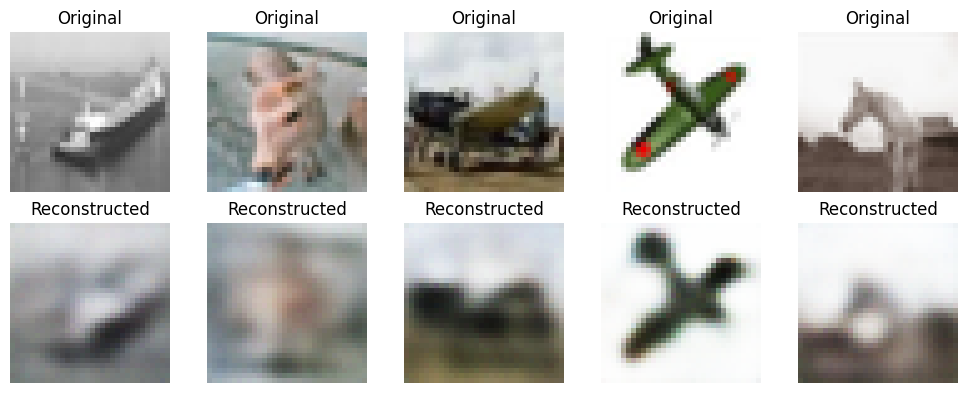

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  65/100  Batch:    1  Train Loss:  3430.89  LR:  1.72515e-05
Epoch:  65/100  Batch:  151  Train Loss:  3587.66  LR:  1.72515e-05
Epoch:  65/100  Batch:  301  Train Loss:  3542.72  LR:  1.72515e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      65 │          3333.71 │ 5.16s  │
╘═════════╧══════════════════╧════════╛


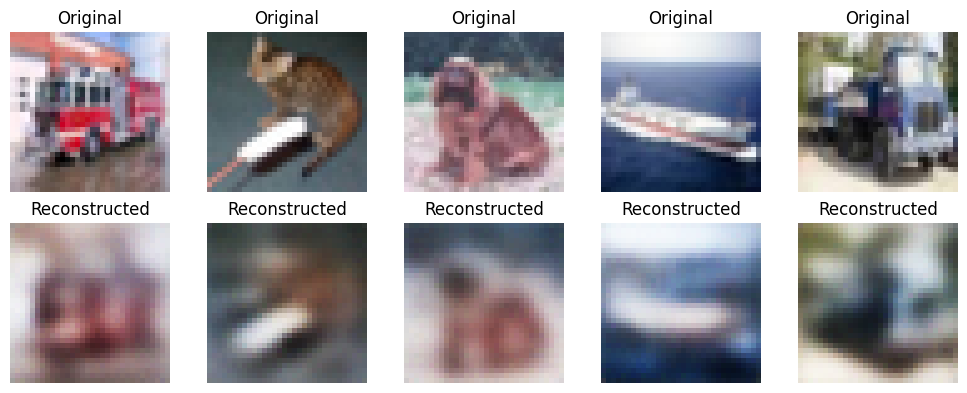

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  66/100  Batch:    1  Train Loss:  3049.32  LR:  1.82443e-05
Epoch:  66/100  Batch:  151  Train Loss:  3316.99  LR:  1.82443e-05
Epoch:  66/100  Batch:  301  Train Loss:  3421.97  LR:  1.82443e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      66 │          3335.96 │ 5.27s  │
╘═════════╧══════════════════╧════════╛


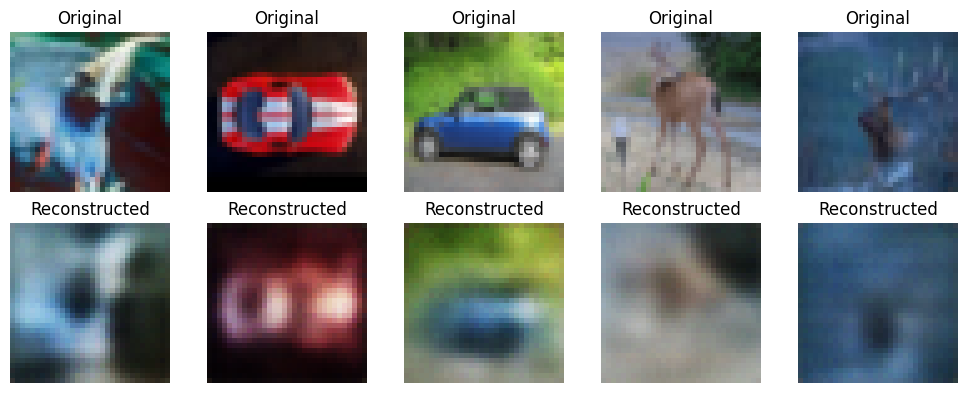

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  67/100  Batch:    1  Train Loss:  3098.89  LR:  1.92835e-05
Epoch:  67/100  Batch:  151  Train Loss:  3528.32  LR:  1.92835e-05
Epoch:  67/100  Batch:  301  Train Loss:  3412.55  LR:  1.92835e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      67 │          3306.67 │ 5.07s  │
╘═════════╧══════════════════╧════════╛


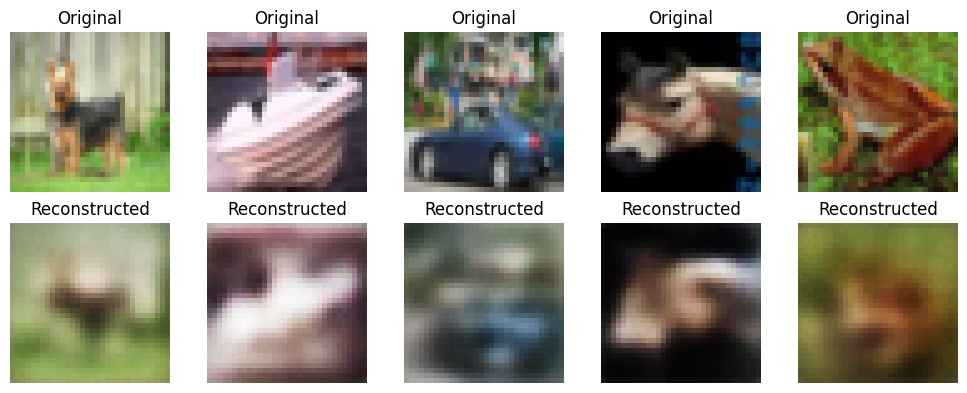

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  68/100  Batch:    1  Train Loss:  3482.95  LR:  2.03649e-05
Epoch:  68/100  Batch:  151  Train Loss:  3289.36  LR:  2.03649e-05
Epoch:  68/100  Batch:  301  Train Loss:  3246.22  LR:  2.03649e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      68 │          3314.78 │ 5.30s  │
╘═════════╧══════════════════╧════════╛


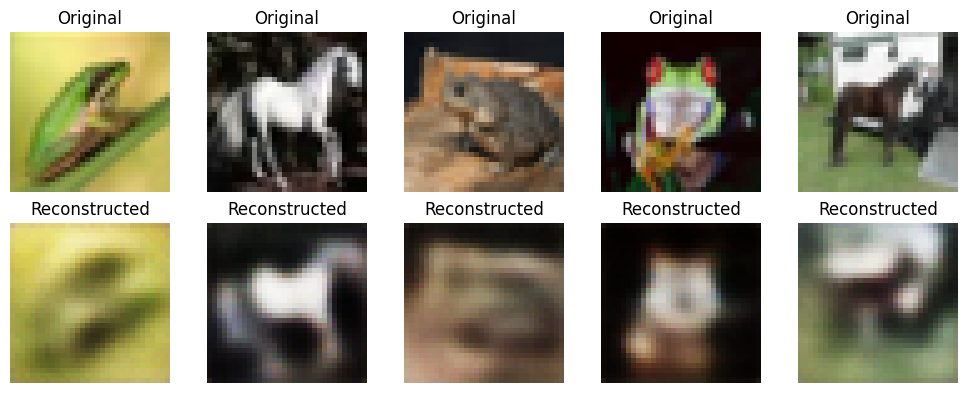

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  69/100  Batch:    1  Train Loss:  3330.26  LR:  2.14844e-05
Epoch:  69/100  Batch:  151  Train Loss:  3450.93  LR:  2.14844e-05
Epoch:  69/100  Batch:  301  Train Loss:  3491.73  LR:  2.14844e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      69 │          3342.45 │ 5.10s  │
╘═════════╧══════════════════╧════════╛


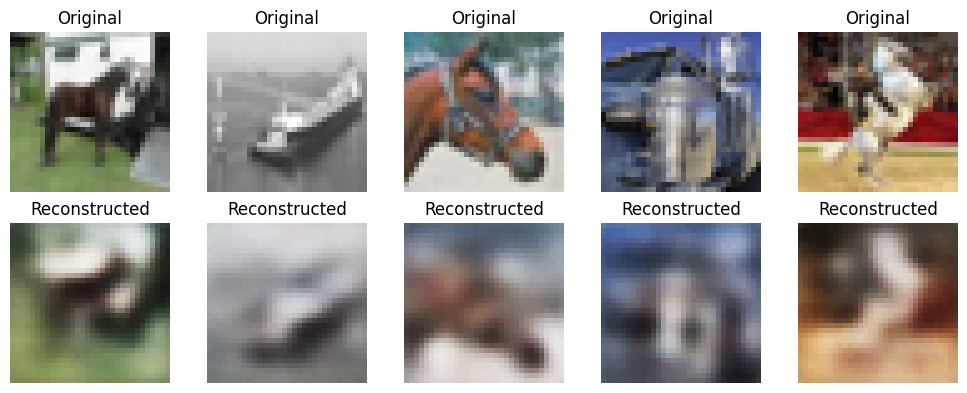

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  70/100  Batch:    1  Train Loss:  3149.81  LR:  2.26375e-05
Epoch:  70/100  Batch:  151  Train Loss:  3575.28  LR:  2.26375e-05
Epoch:  70/100  Batch:  301  Train Loss:  3430.68  LR:  2.26375e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      70 │          3330.73 │ 5.24s  │
╘═════════╧══════════════════╧════════╛


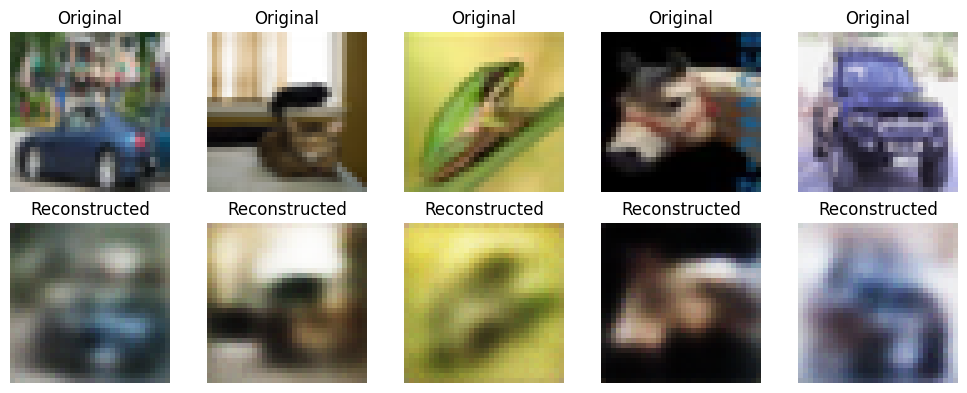

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  71/100  Batch:    1  Train Loss:  3242.48  LR:  2.38197e-05
Epoch:  71/100  Batch:  151  Train Loss:  3252.88  LR:  2.38197e-05
Epoch:  71/100  Batch:  301  Train Loss:  3672.73  LR:  2.38197e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      71 │          3269.41 │ 5.18s  │
╘═════════╧══════════════════╧════════╛


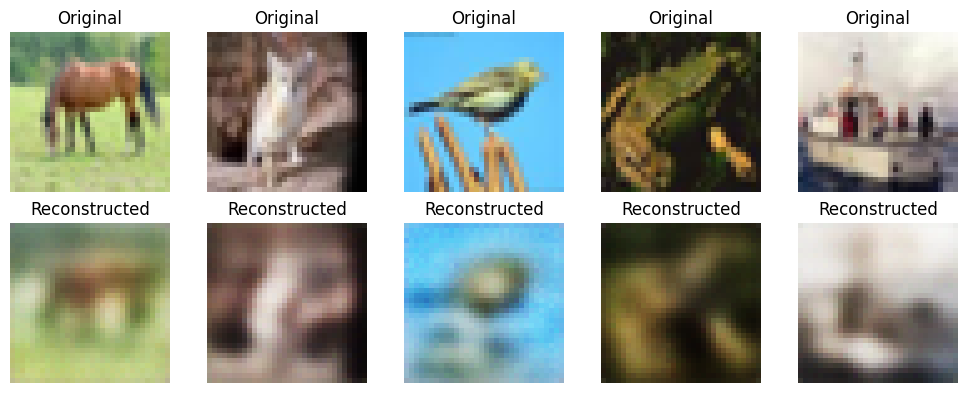

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  72/100  Batch:    1  Train Loss:  3281.8  LR:  2.50262e-05
Epoch:  72/100  Batch:  151  Train Loss:  3392.9  LR:  2.50262e-05
Epoch:  72/100  Batch:  301  Train Loss:  3916.64  LR:  2.50262e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      72 │          3297.09 │ 5.49s  │
╘═════════╧══════════════════╧════════╛


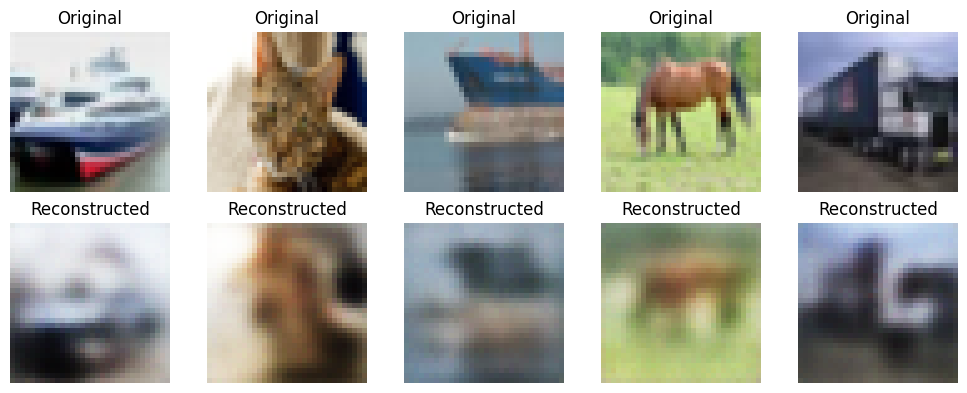

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  73/100  Batch:    1  Train Loss:  3412.66  LR:  2.62524e-05
Epoch:  73/100  Batch:  151  Train Loss:  3592.64  LR:  2.62524e-05
Epoch:  73/100  Batch:  301  Train Loss:  3400.25  LR:  2.62524e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      73 │           3258.8 │ 5.16s  │
╘═════════╧══════════════════╧════════╛


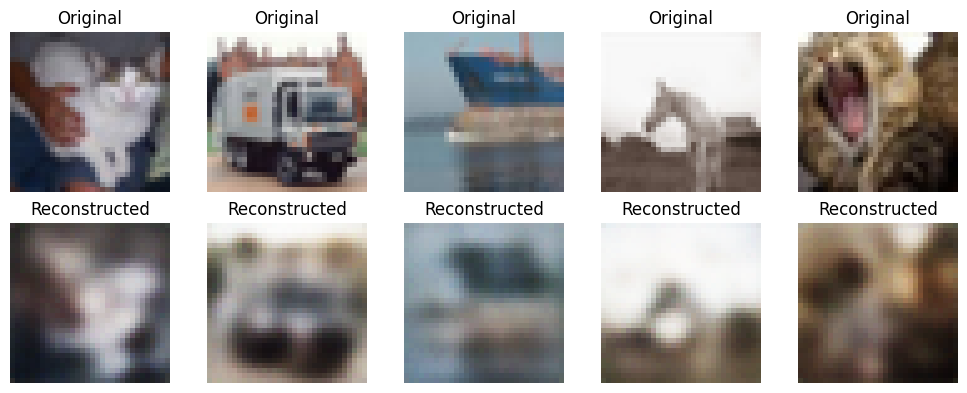

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  74/100  Batch:    1  Train Loss:  3393.45  LR:  2.74933e-05
Epoch:  74/100  Batch:  151  Train Loss:  3462.84  LR:  2.74933e-05
Epoch:  74/100  Batch:  301  Train Loss:  3397.77  LR:  2.74933e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      74 │          3329.68 │ 5.39s  │
╘═════════╧══════════════════╧════════╛


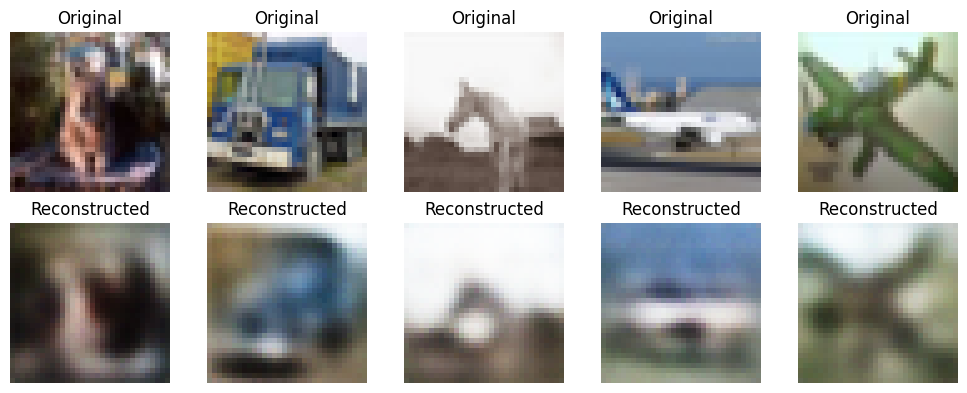

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  75/100  Batch:    1  Train Loss:  3212.34  LR:  2.87442e-05
Epoch:  75/100  Batch:  151  Train Loss:  3139.01  LR:  2.87442e-05
Epoch:  75/100  Batch:  301  Train Loss:  3374.81  LR:  2.87442e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      75 │          3390.99 │ 5.09s  │
╘═════════╧══════════════════╧════════╛


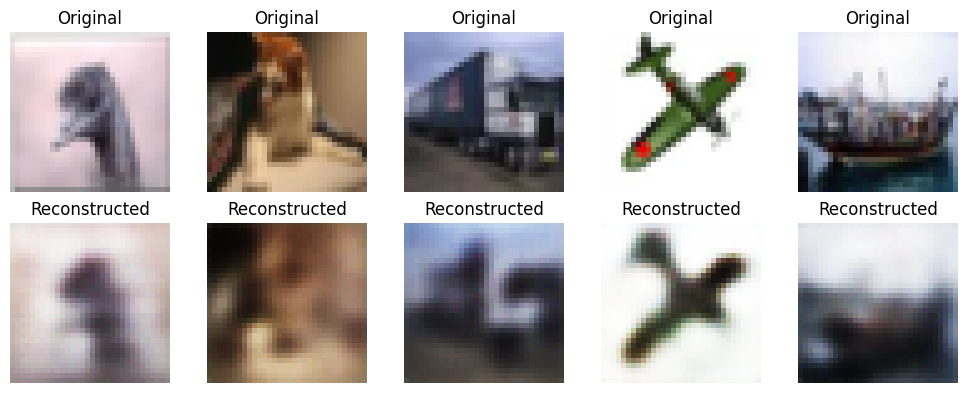

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  76/100  Batch:    1  Train Loss:  3112.73  LR:  3e-05
Epoch:  76/100  Batch:  151  Train Loss:  3110.26  LR:  3e-05
Epoch:  76/100  Batch:  301  Train Loss:  3325.68  LR:  3e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      76 │          3259.63 │ 5.19s  │
╘═════════╧══════════════════╧════════╛


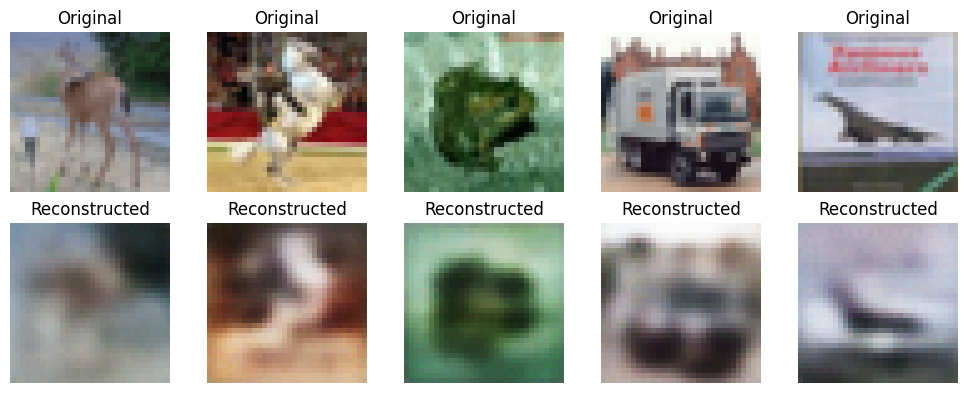

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  77/100  Batch:    1  Train Loss:  3189.72  LR:  3.12558e-05
Epoch:  77/100  Batch:  151  Train Loss:  3340.46  LR:  3.12558e-05
Epoch:  77/100  Batch:  301  Train Loss:  3319.21  LR:  3.12558e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      77 │          3314.58 │ 5.17s  │
╘═════════╧══════════════════╧════════╛


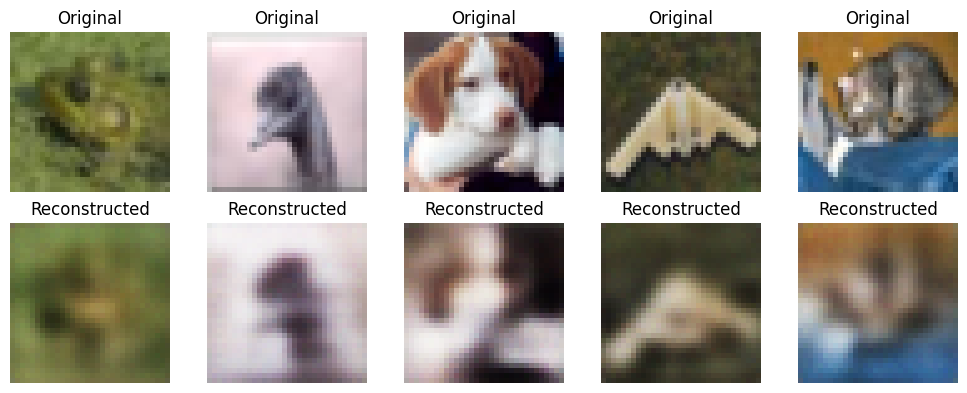

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  78/100  Batch:    1  Train Loss:  3268.4  LR:  3.25067e-05
Epoch:  78/100  Batch:  151  Train Loss:  3526.44  LR:  3.25067e-05
Epoch:  78/100  Batch:  301  Train Loss:  3384.09  LR:  3.25067e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      78 │          3238.84 │ 5.23s  │
╘═════════╧══════════════════╧════════╛


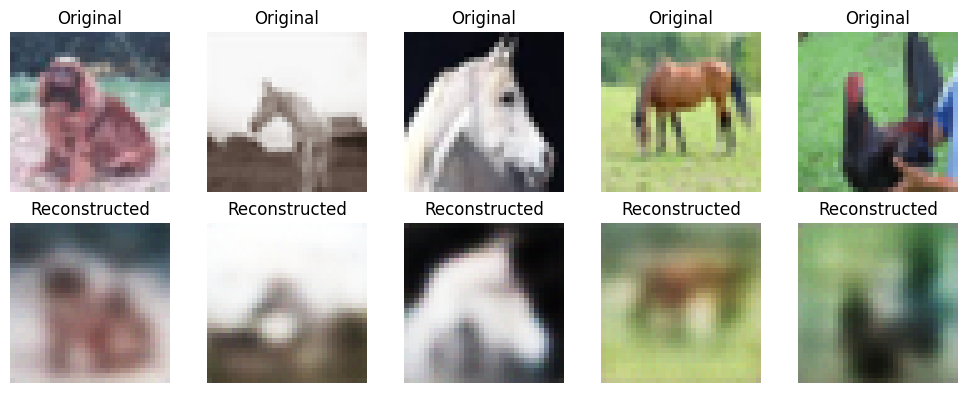

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  79/100  Batch:    1  Train Loss:  3475.71  LR:  3.37476e-05
Epoch:  79/100  Batch:  151  Train Loss:  3508.36  LR:  3.37476e-05
Epoch:  79/100  Batch:  301  Train Loss:  3339.01  LR:  3.37476e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      79 │          3216.27 │ 5.36s  │
╘═════════╧══════════════════╧════════╛


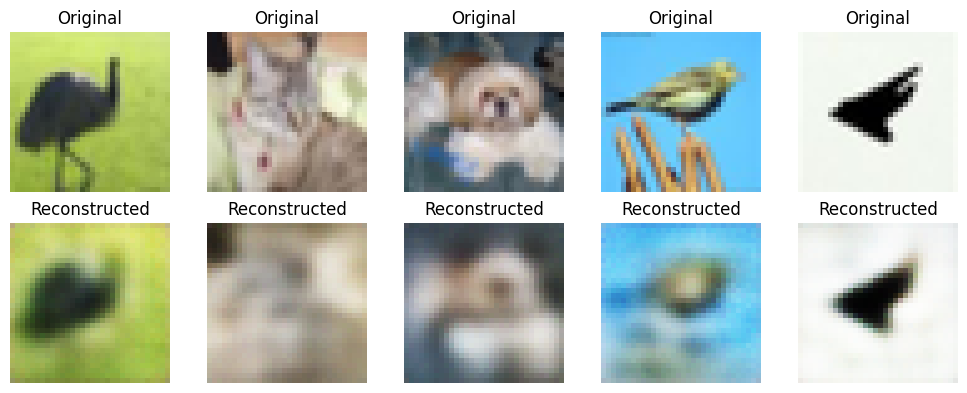

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  80/100  Batch:    1  Train Loss:  3105.68  LR:  3.49738e-05
Epoch:  80/100  Batch:  151  Train Loss:  3288.42  LR:  3.49738e-05
Epoch:  80/100  Batch:  301  Train Loss:  3156.21  LR:  3.49738e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      80 │          3244.47 │ 5.45s  │
╘═════════╧══════════════════╧════════╛


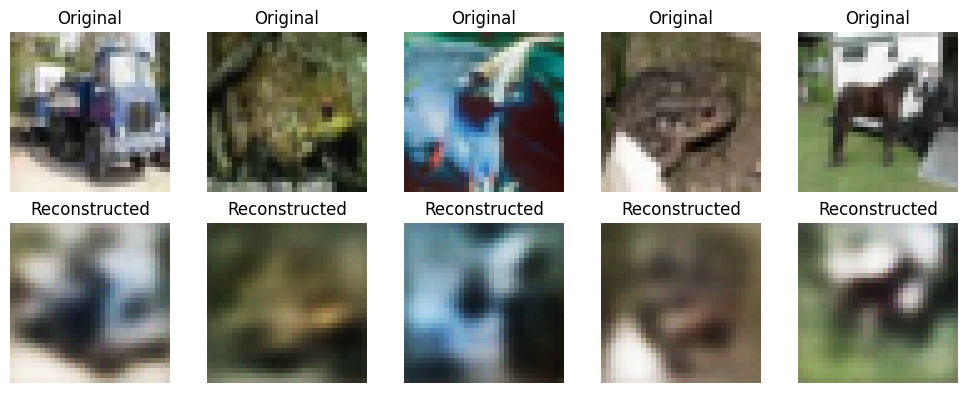

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  81/100  Batch:    1  Train Loss:  3122.88  LR:  3.61803e-05
Epoch:  81/100  Batch:  151  Train Loss:  3181.15  LR:  3.61803e-05
Epoch:  81/100  Batch:  301  Train Loss:  3263.6  LR:  3.61803e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      81 │          3245.09 │ 5.16s  │
╘═════════╧══════════════════╧════════╛


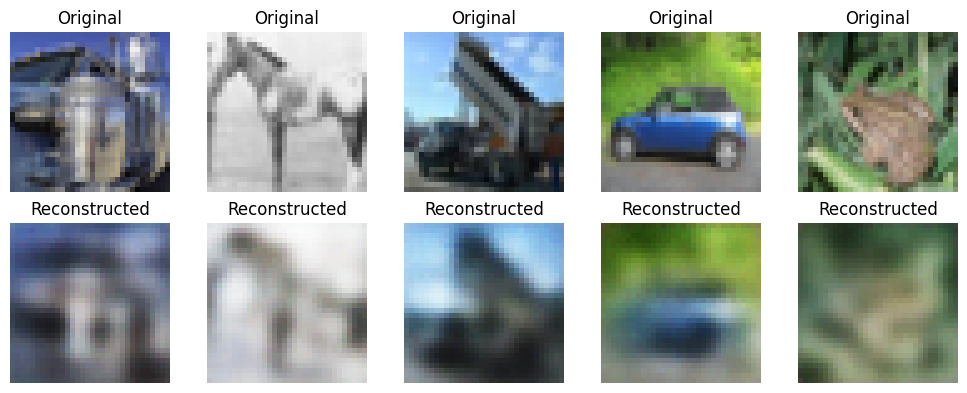

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  82/100  Batch:    1  Train Loss:  3359.58  LR:  3.73625e-05
Epoch:  82/100  Batch:  151  Train Loss:  3114.18  LR:  3.73625e-05
Epoch:  82/100  Batch:  301  Train Loss:  3108.86  LR:  3.73625e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      82 │          3159.85 │ 5.28s  │
╘═════════╧══════════════════╧════════╛


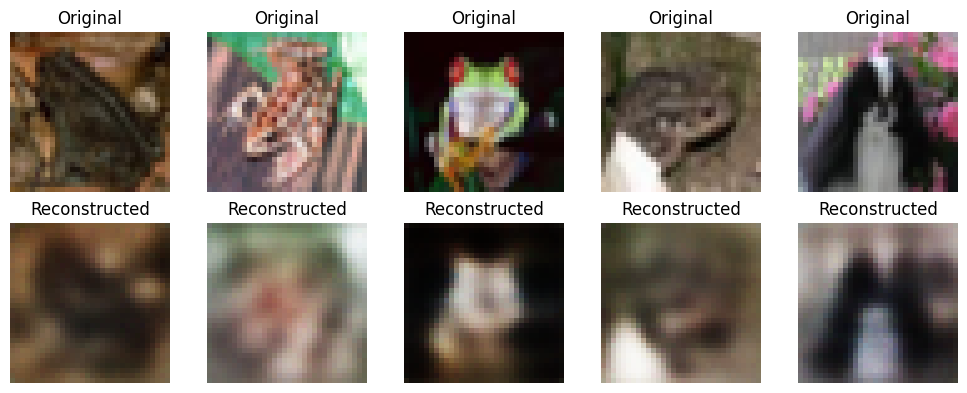

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  83/100  Batch:    1  Train Loss:  3018.65  LR:  3.85156e-05
Epoch:  83/100  Batch:  151  Train Loss:  3228.25  LR:  3.85156e-05
Epoch:  83/100  Batch:  301  Train Loss:  3132.02  LR:  3.85156e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      83 │           3230.6 │ 5.20s  │
╘═════════╧══════════════════╧════════╛


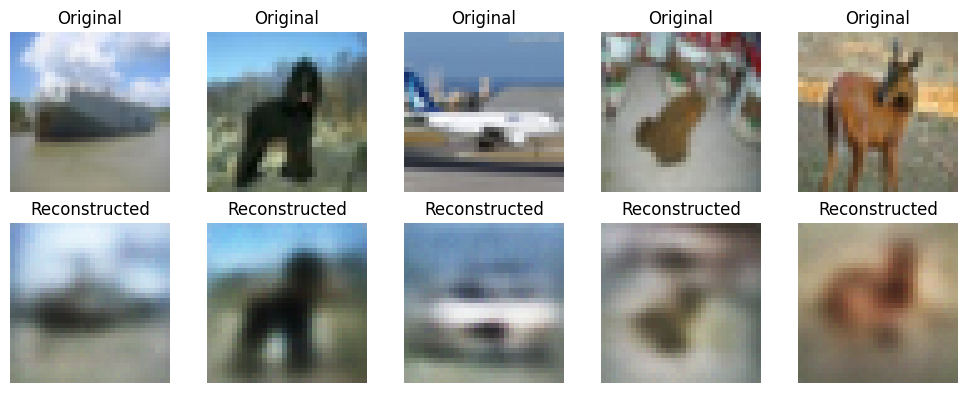

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  84/100  Batch:    1  Train Loss:  3314.38  LR:  3.96351e-05
Epoch:  84/100  Batch:  151  Train Loss:  3146.81  LR:  3.96351e-05
Epoch:  84/100  Batch:  301  Train Loss:  3296.05  LR:  3.96351e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      84 │           3412.5 │ 5.43s  │
╘═════════╧══════════════════╧════════╛


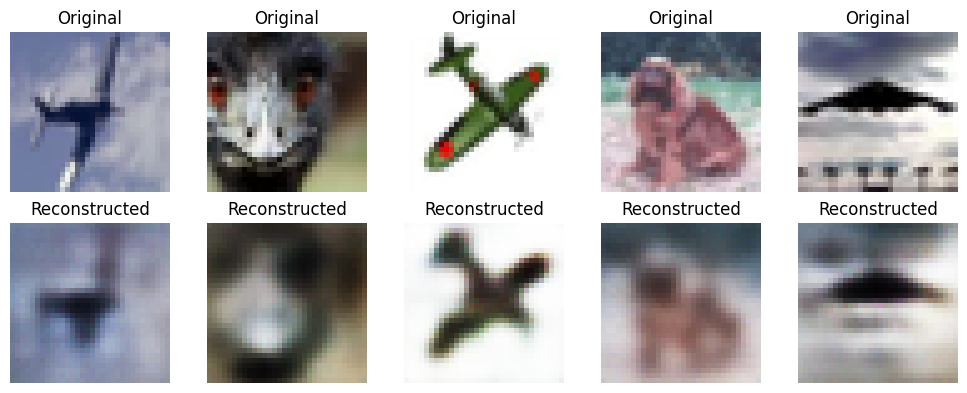

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  85/100  Batch:    1  Train Loss:  3325.74  LR:  4.07165e-05
Epoch:  85/100  Batch:  151  Train Loss:  3207.33  LR:  4.07165e-05
Epoch:  85/100  Batch:  301  Train Loss:  3281.78  LR:  4.07165e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      85 │          3273.85 │ 5.26s  │
╘═════════╧══════════════════╧════════╛


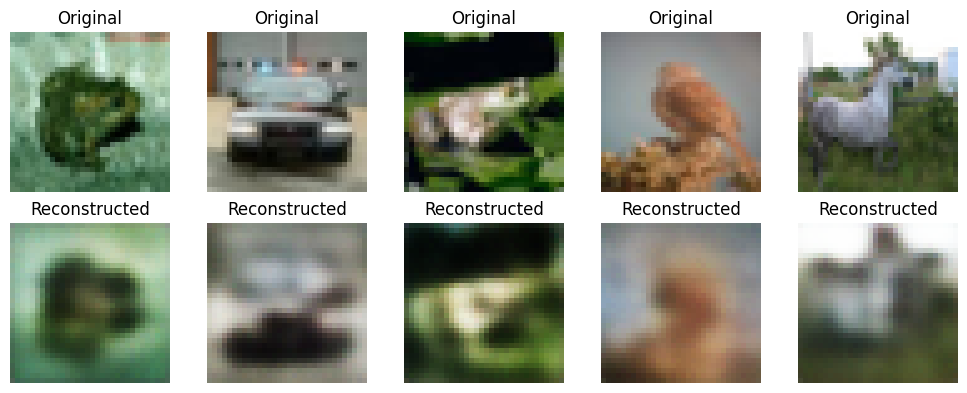

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  86/100  Batch:    1  Train Loss:  3197.94  LR:  4.17557e-05
Epoch:  86/100  Batch:  151  Train Loss:  3103.51  LR:  4.17557e-05
Epoch:  86/100  Batch:  301  Train Loss:  3212.47  LR:  4.17557e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      86 │          3347.07 │ 5.25s  │
╘═════════╧══════════════════╧════════╛


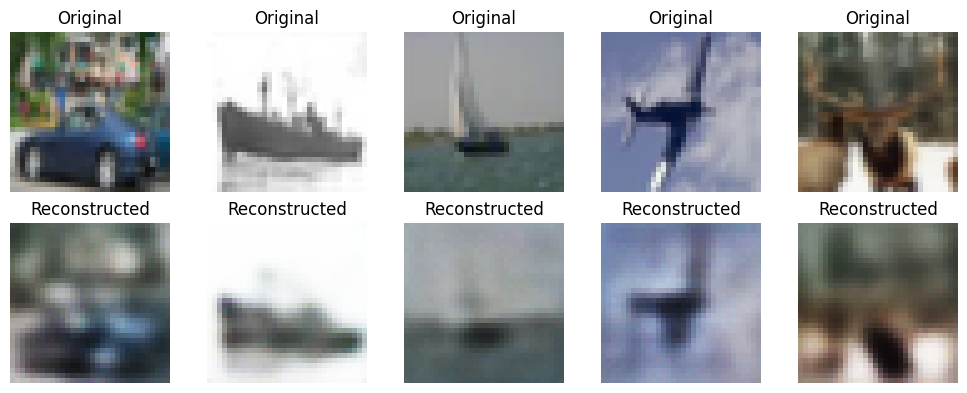

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  87/100  Batch:    1  Train Loss:  3117.96  LR:  4.27485e-05
Epoch:  87/100  Batch:  151  Train Loss:  3000.9  LR:  4.27485e-05
Epoch:  87/100  Batch:  301  Train Loss:  3220.87  LR:  4.27485e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      87 │          3063.52 │ 5.39s  │
╘═════════╧══════════════════╧════════╛


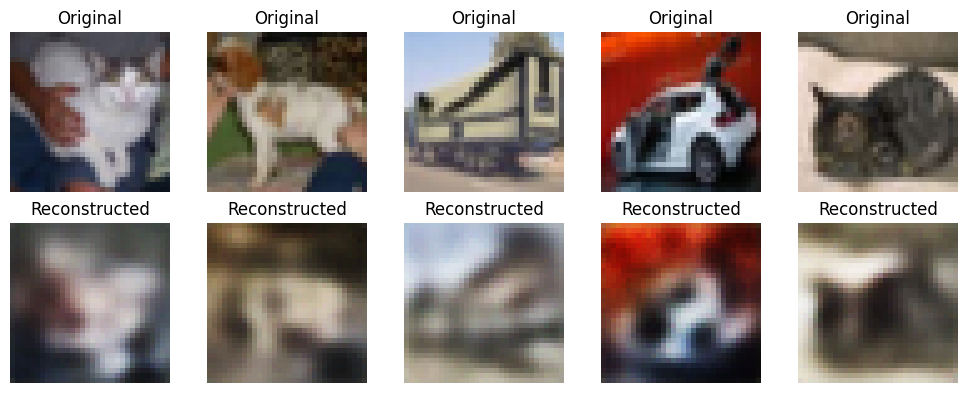

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  88/100  Batch:    1  Train Loss:  2966.3  LR:  4.36909e-05
Epoch:  88/100  Batch:  151  Train Loss:  3061.82  LR:  4.36909e-05
Epoch:  88/100  Batch:  301  Train Loss:  3102.84  LR:  4.36909e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      88 │          3085.99 │ 5.21s  │
╘═════════╧══════════════════╧════════╛


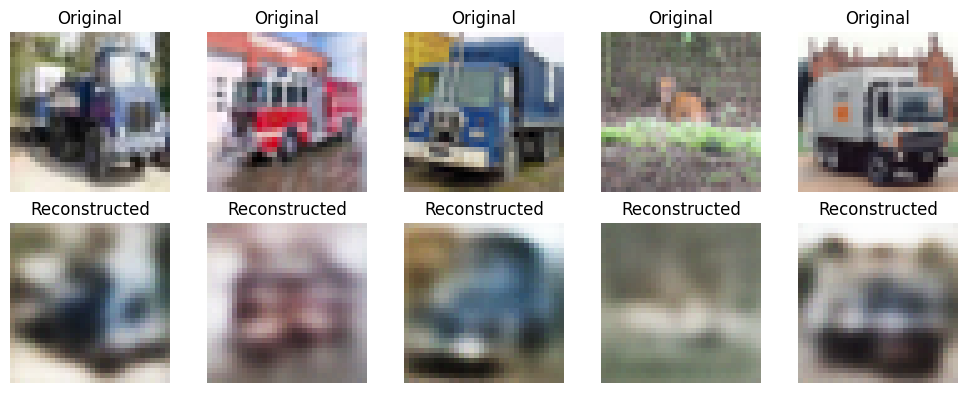

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  89/100  Batch:    1  Train Loss:  3319.64  LR:  4.45794e-05
Epoch:  89/100  Batch:  151  Train Loss:  3174.33  LR:  4.45794e-05
Epoch:  89/100  Batch:  301  Train Loss:  2831.88  LR:  4.45794e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      89 │          3314.48 │ 5.14s  │
╘═════════╧══════════════════╧════════╛


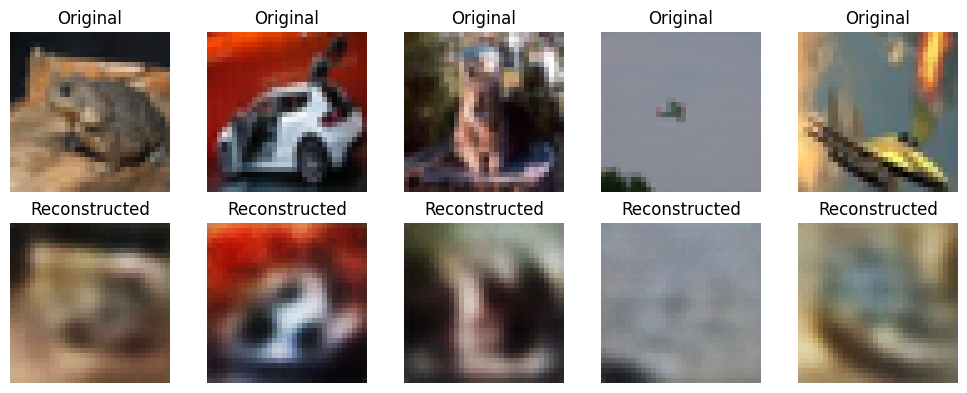

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  90/100  Batch:    1  Train Loss:  3053.83  LR:  4.54103e-05
Epoch:  90/100  Batch:  151  Train Loss:  3061.49  LR:  4.54103e-05
Epoch:  90/100  Batch:  301  Train Loss:  2955.97  LR:  4.54103e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      90 │          3297.08 │ 5.18s  │
╘═════════╧══════════════════╧════════╛


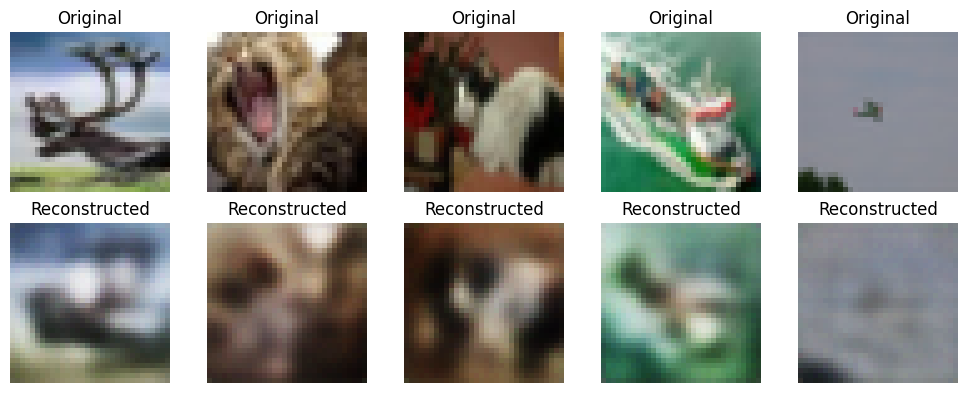

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  91/100  Batch:    1  Train Loss:  3024.82  LR:  4.61803e-05
Epoch:  91/100  Batch:  151  Train Loss:  3040.3  LR:  4.61803e-05
Epoch:  91/100  Batch:  301  Train Loss:  3052.71  LR:  4.61803e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      91 │          3109.79 │ 5.23s  │
╘═════════╧══════════════════╧════════╛


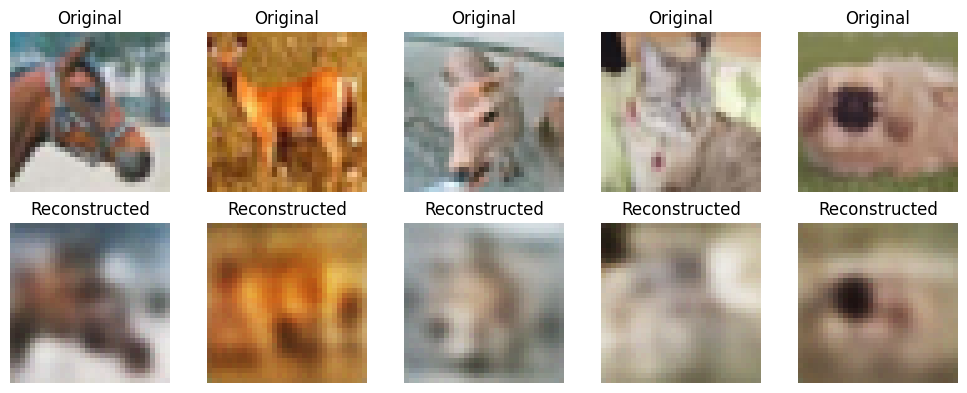

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  92/100  Batch:    1  Train Loss:  3073.43  LR:  4.68866e-05
Epoch:  92/100  Batch:  151  Train Loss:  3087.7  LR:  4.68866e-05
Epoch:  92/100  Batch:  301  Train Loss:  2831.83  LR:  4.68866e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      92 │           3121.4 │ 5.32s  │
╘═════════╧══════════════════╧════════╛


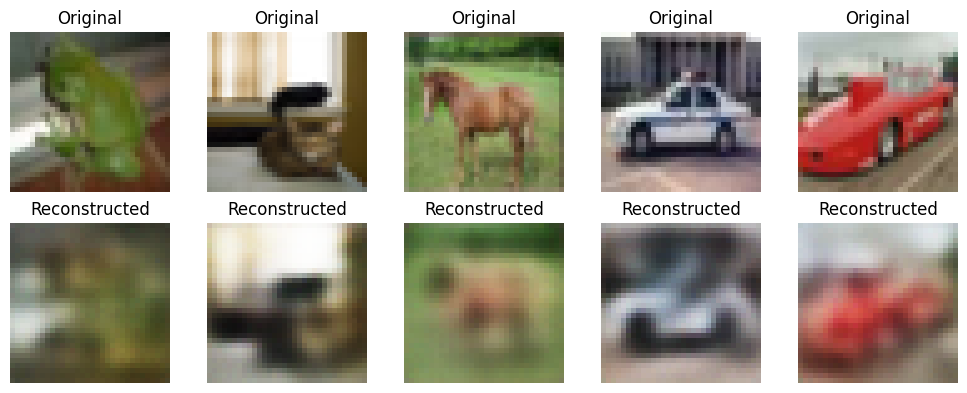

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  93/100  Batch:    1  Train Loss:  3157.82  LR:  4.75261e-05
Epoch:  93/100  Batch:  151  Train Loss:  2993.38  LR:  4.75261e-05
Epoch:  93/100  Batch:  301  Train Loss:  2949.12  LR:  4.75261e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      93 │          3044.38 │ 5.22s  │
╘═════════╧══════════════════╧════════╛


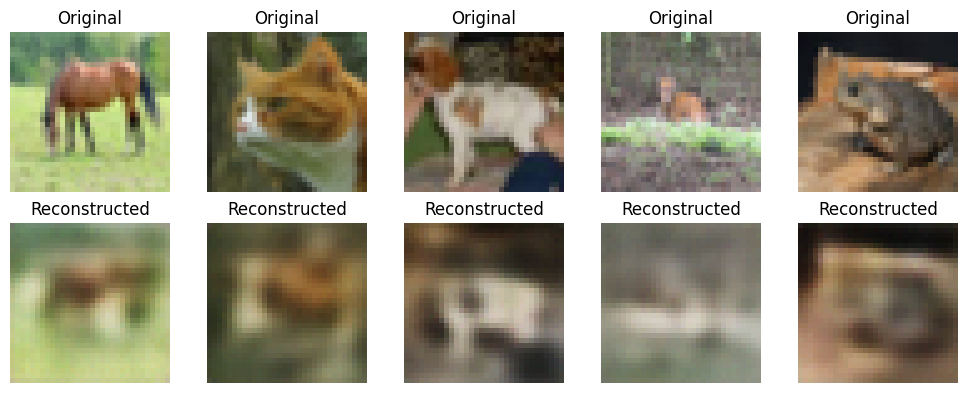

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  94/100  Batch:    1  Train Loss:  2988.44  LR:  4.80965e-05
Epoch:  94/100  Batch:  151  Train Loss:  2897.28  LR:  4.80965e-05
Epoch:  94/100  Batch:  301  Train Loss:  2855.43  LR:  4.80965e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      94 │          3056.83 │ 5.18s  │
╘═════════╧══════════════════╧════════╛


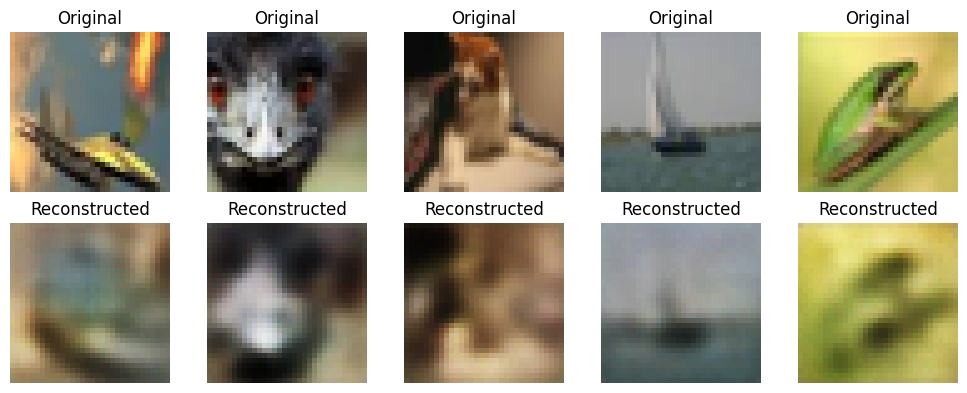

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  95/100  Batch:    1  Train Loss:  2977.13  LR:  4.85955e-05
Epoch:  95/100  Batch:  151  Train Loss:  2918.16  LR:  4.85955e-05
Epoch:  95/100  Batch:  301  Train Loss:  2722.05  LR:  4.85955e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      95 │          3062.27 │ 5.33s  │
╘═════════╧══════════════════╧════════╛


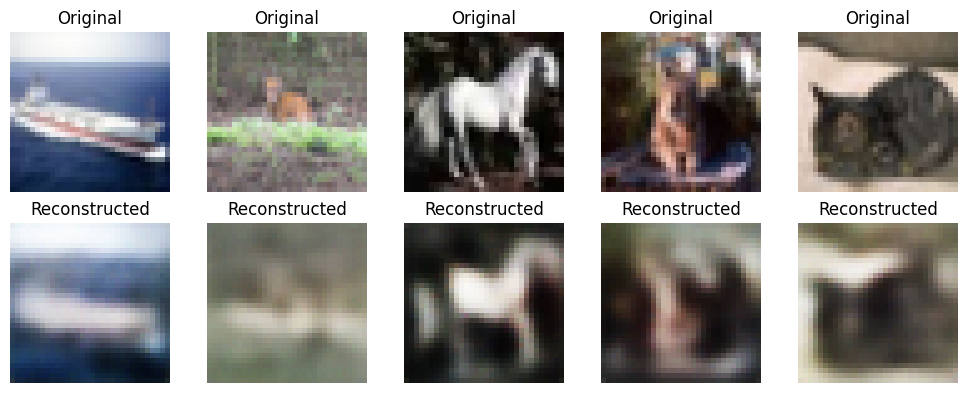

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  96/100  Batch:    1  Train Loss:  3025.73  LR:  4.90211e-05
Epoch:  96/100  Batch:  151  Train Loss:  2963.09  LR:  4.90211e-05
Epoch:  96/100  Batch:  301  Train Loss:  2887.64  LR:  4.90211e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      96 │          3015.14 │ 5.22s  │
╘═════════╧══════════════════╧════════╛


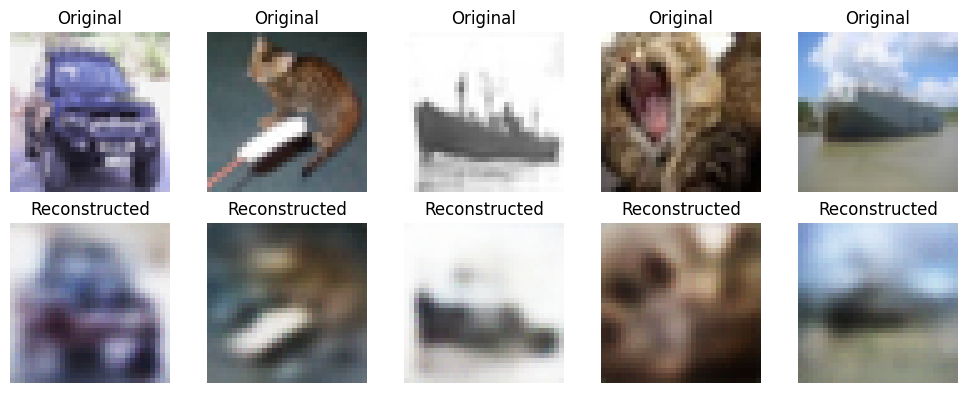

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  97/100  Batch:    1  Train Loss:  3003.43  LR:  4.93717e-05
Epoch:  97/100  Batch:  151  Train Loss:  2873.46  LR:  4.93717e-05
Epoch:  97/100  Batch:  301  Train Loss:  2869.86  LR:  4.93717e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      97 │          3088.03 │ 5.30s  │
╘═════════╧══════════════════╧════════╛


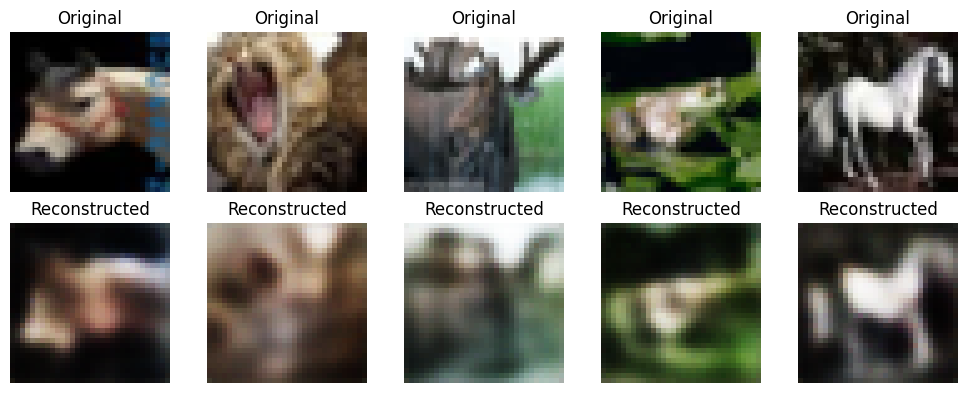

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  98/100  Batch:    1  Train Loss:  3129.3  LR:  4.96457e-05
Epoch:  98/100  Batch:  151  Train Loss:  2764.95  LR:  4.96457e-05
Epoch:  98/100  Batch:  301  Train Loss:  2976.17  LR:  4.96457e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      98 │          3133.45 │ 5.24s  │
╘═════════╧══════════════════╧════════╛


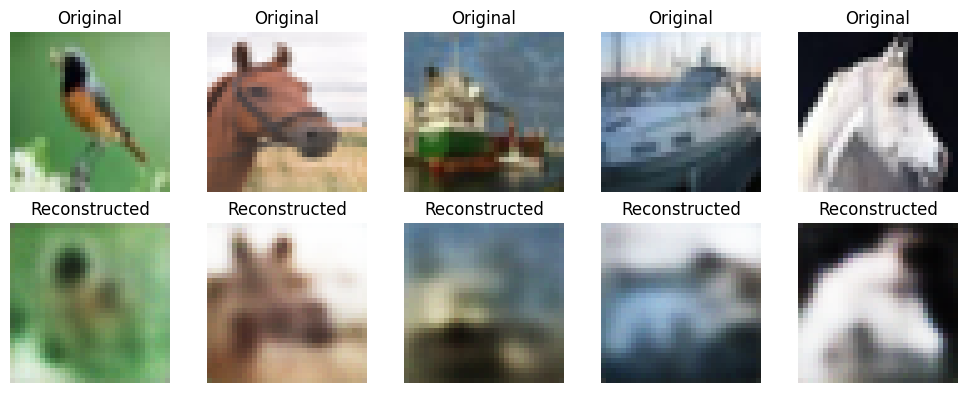

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  99/100  Batch:    1  Train Loss:  3024.38  LR:  4.98423e-05
Epoch:  99/100  Batch:  151  Train Loss:  3352.5  LR:  4.98423e-05
Epoch:  99/100  Batch:  301  Train Loss:  2900.73  LR:  4.98423e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      99 │          2986.14 │ 5.30s  │
╘═════════╧══════════════════╧════════╛


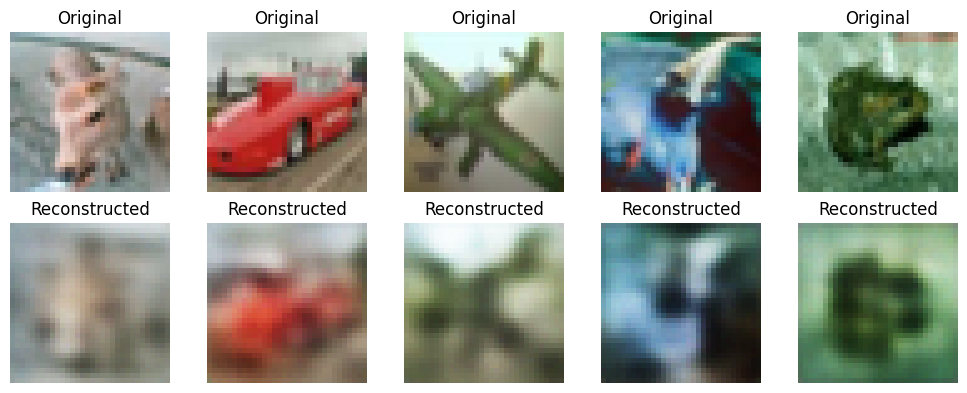

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  100/100  Batch:    1  Train Loss:  2853.74  LR:  4.99605e-05
Epoch:  100/100  Batch:  151  Train Loss:  3243.86  LR:  4.99605e-05
Epoch:  100/100  Batch:  301  Train Loss:  2871  LR:  4.99605e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│     100 │          2897.66 │ 5.38s  │
╘═════════╧══════════════════╧════════╛


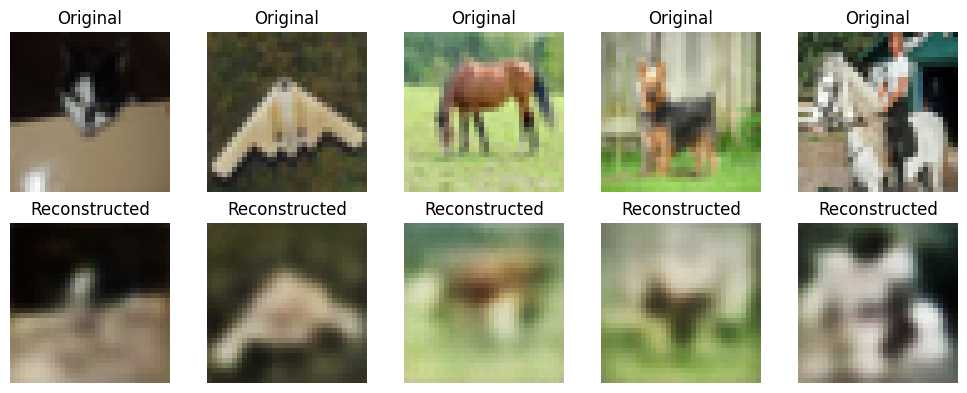

-----------------------------------------------------------------------------------------------------------------------------


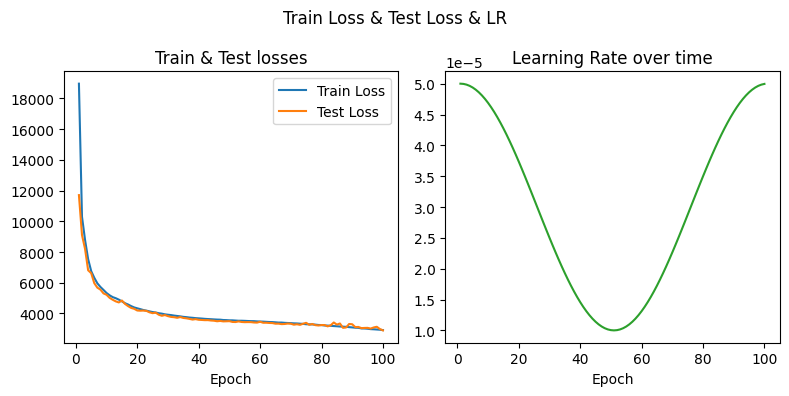

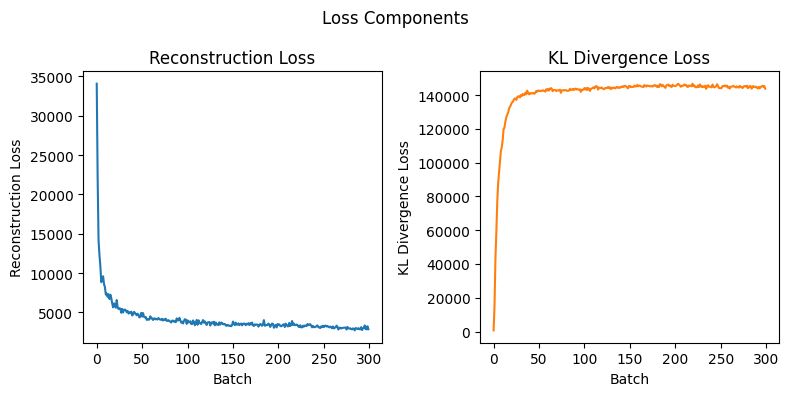

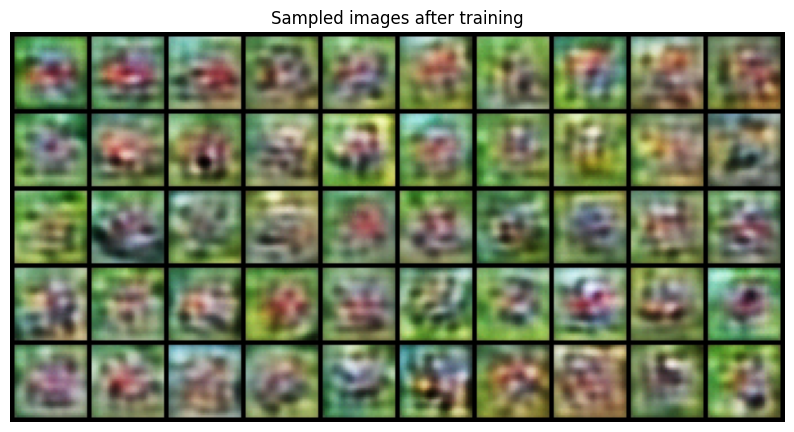

In [4]:
# Suppress user warnings
warnings.filterwarnings("ignore", category=UserWarning)

# We want to plot loss, its components and learning rate at the end of training
train_losses = []
test_losses = []
learning_rates = []
reconstruction_losses = []
kl_losses = []

# Training loop
for epoch in range(num_epochs):
  print('-----------------------------------------------------------------------------------------------------------------------------')
  model.train()
  losses = []

  # Start of time measurement
  epoch_start_time = time.time()

  for batch_idx, (data, _) in enumerate(train_loader):
    data = data.to(device)
    optimizer.zero_grad()

    with torch.cuda.amp.autocast():
      # Forward pass
      recon_batch, mu, logvar = model(data)

      # Compute loss
      loss, recon_loss, kl_loss = loss_function(recon_batch, data, mu, logvar)

    # Backward pass
    scaler.scale(loss).backward()

    # Optimization step
    scaler.step(optimizer)
    scaler.update()

    # Save the loss value for current batch
    curr_loss = loss.detach().clone()
    losses.append(curr_loss)

    # Log training loss and current learning rate
    if batch_idx % output_frequency == 0:
      reconstruction_losses.append(recon_loss.detach().clone())
      kl_losses.append(kl_loss.detach().clone())
      log = [['Epoch:', f'{epoch + 1:3d}/{num_epochs:3d}', 'Batch:', f'{batch_idx + 1:3d}',
              'Train Loss:', f'{curr_loss:.6f}', 'LR:', scheduler.get_last_lr()[0]]]
      print(tabulate(log, tablefmt="plain"))

  # Step the learning rate scheduler
  if scheduler is not None:
    lr = scheduler.get_last_lr()[0]
    scheduler.step()
  else:
    lr = learning_rate
  learning_rates.append(lr)

  # After the epoch, evaluate the accuracy on the test dataset
  mean_loss = evaluate(model, test_loader, loss_function, device)
  test_losses.append(mean_loss)

  # Save the average training loss
  average_loss = torch.stack(losses).mean().item()
  train_losses.append(average_loss)

  # End of time measurement
  elapsed_time = time.time() - epoch_start_time

  # Log as a horizontal table
  headers = ["Epoch", "Mean Test Loss", "Time"]
  data = [[epoch + 1, f"{mean_loss:.4f}", f"{elapsed_time:.2f}s"]]
  print(tabulate(data, headers=headers, tablefmt="fancy_grid"))

  # Generate reconstructed test images after each epoch
  plot_reconstruction(model, test_loader, device, num_samples=5)
  print('-----------------------------------------------------------------------------------------------------------------------------')

# Plot Train Loss & Test Loss & LR
plot_loss_lr(num_epochs, train_losses, test_losses, learning_rates)

# Plot each loss component
plot_loss_components(reconstruction_losses, kl_losses)

# Sample some VAE-generated images
sample(model, device, latent_dim, num_samples=50)